# Compreensão Inicial dos Dados

In [437]:
# Bibliotecas necessárias para o projeto

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Bibliotecas Classificadoras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Outras Bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [438]:
df = pd.read_csv('../data/creditcard.csv', sep=',', encoding='UTF-8')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [439]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,...,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000
mean,67472.753699,-0.123262,0.011192,0.372657,0.087088,-0.132063,0.050776,-0.060121,0.021925,0.011903,...,-0.017942,-0.058597,-0.017657,0.005437,0.070404,0.007942,0.001779,0.002104,89.239816,0.001953
std,32573.999853,1.882621,1.619740,1.431349,1.391989,1.356669,1.306751,1.213169,1.212479,1.139985,...,0.739649,0.684510,0.604654,0.602432,0.483171,0.489305,0.392889,0.310538,248.106606,0.044146
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,43234.000000,-0.968508,-0.571526,-0.250238,-0.779422,-0.798475,-0.704009,-0.580287,-0.175384,-0.661807,...,-0.228079,-0.540579,-0.169167,-0.339337,-0.227662,-0.331227,-0.066777,-0.038392,5.990000,0.000000
50%,65122.000000,-0.115844,0.087002,0.533572,0.089263,-0.187758,-0.213408,-0.017549,0.047006,-0.075014,...,-0.046333,-0.044542,-0.031035,0.054482,0.114247,-0.060704,0.006817,0.019263,22.800000,0.000000
75%,84756.000000,1.203685,0.787105,1.247928,0.903544,0.436792,0.446211,0.487953,0.341655,0.630348,...,0.144500,0.405311,0.110240,0.419939,0.389045,0.264696,0.089266,0.078149,79.000000,0.000000
max,128643.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [440]:
df.isnull().sum().max()

np.int64(0)

In [441]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189999 entries, 0 to 189998
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    189999 non-null  float64
 1   V1      189999 non-null  float64
 2   V2      189999 non-null  float64
 3   V3      189999 non-null  float64
 4   V4      189999 non-null  float64
 5   V5      189999 non-null  float64
 6   V6      189999 non-null  float64
 7   V7      189999 non-null  float64
 8   V8      189999 non-null  float64
 9   V9      189999 non-null  float64
 10  V10     189999 non-null  float64
 11  V11     189999 non-null  float64
 12  V12     189999 non-null  float64
 13  V13     189999 non-null  float64
 14  V14     189999 non-null  float64
 15  V15     189999 non-null  float64
 16  V16     189999 non-null  float64
 17  V17     189999 non-null  float64
 18  V18     189999 non-null  float64
 19  V19     189999 non-null  float64
 20  V20     189999 non-null  float64
 21  V21     18

- Verificando se meus dados estão balancedos por meio da distribuição da Coluna class da amostra dos dados.

In [443]:
df['Class'].value_counts()


Class
0    189628
1       371
Name: count, dtype: int64

Text(0.5, 1.0, 'Class Distribuições \n (0: No Fraud | 1: Fraud)')

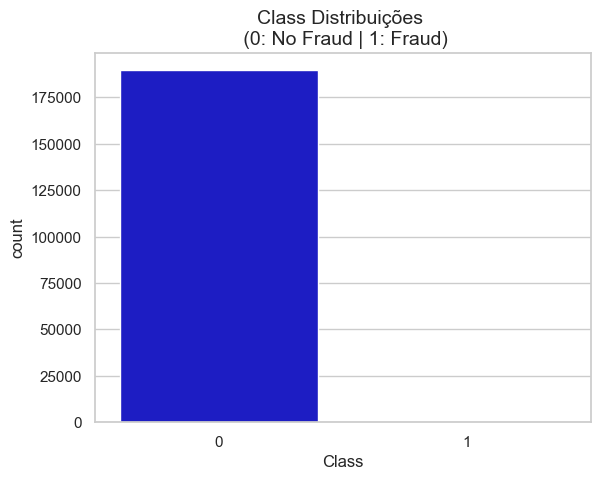

In [444]:
cores = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=cores)
plt.title('Class Distribuições \n (0: No Fraud | 1: Fraud)', fontsize=14)

In [445]:
class_counts = df['Class'].value_counts()
razão_desequilíbrio = class_counts.max() / class_counts.min()
print(f"Razão de desbalanceamento: {razão_desequilíbrio}")

Razão de desbalanceamento: 511.1266846361186


In [446]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% do conjunto de dados')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% do conjunto de dados')

No Frauds 99.8 % do conjunto de dados
Frauds 0.2 % do conjunto de dados


- Neste contexto, os resultados do comando mostram que a classe 0 ("No Frauds") possui 189.628 amostras, enquanto a classe 1 ("Frauds") conta com apenas 371 amostras, resultando em uma razão de desbalanceamento de 511. Uma razão de 10 ou mais é geralmente considerada um desbalanceamento elevado. Com esses números, podemos concluir que há um desbalanceamento extremo nos dados, já que a classe 0 é significativamente mais representativa do que a classe 1.
- Se usarmos esse dataframe como base para nossos modelos preditivos e análises, podemos obter muitos erros e nossos algoritmos provavelmente se ajustarão demais, pois "assumirão" que a maioria das transações não é fraude.

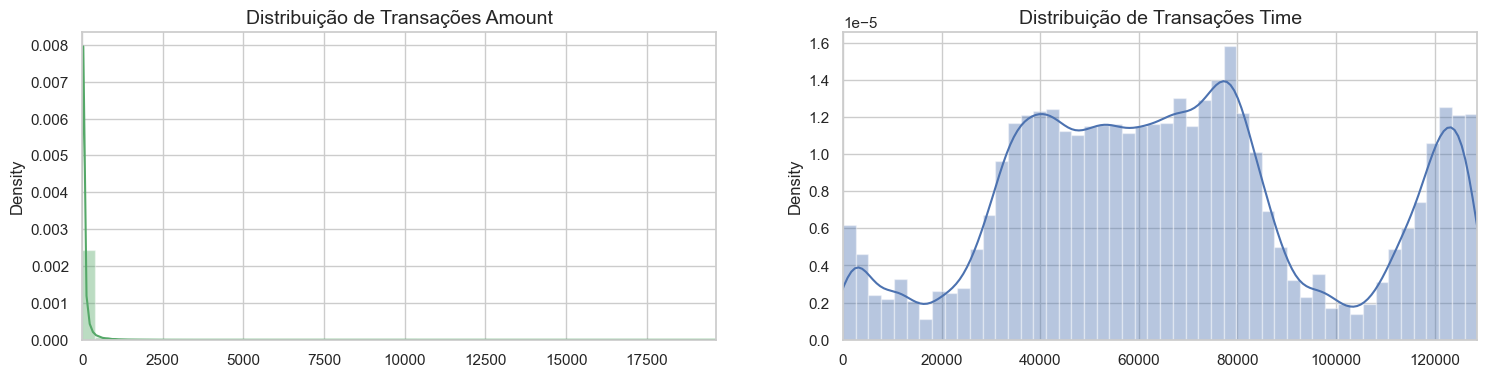

In [447]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Distribuição de Transações Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribuição de Transações Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()


### Escala e Distribuição  

Nesta etapa do processo, vamos escalonar as colunas relacionadas ao **Tempo** e à **Quantidade**, aplicando o mesmo tratamento dado às demais variáveis do conjunto de dados. Além disso, criaremos uma subamostra balanceada, garantindo uma proporção igual de casos de fraudes e não fraudes. Isso ajudará os algoritmos a identificar com maior precisão os padrões que distinguem transações fraudulentas das legítimas.  

### O que é uma subamostra?  
Neste contexto, uma subamostra refere-se a um subconjunto do dataframe original com uma distribuição equilibrada de 50/50 entre transações fraudulentas e não fraudulentas. Em outras palavras, ela terá a mesma quantidade de registros para ambas as classes.  

### Por que criar uma subamostra?  
No início deste estudo, observamos que o conjunto de dados original apresentava um **desequilíbrio significativo** entre as classes. Trabalhar diretamente com esses dados desbalanceados pode gerar os seguintes problemas:  
- **Overfitting**: O modelo pode ser tendencioso, assumindo que a maioria das transações são legítimas. Nosso objetivo é garantir que o modelo seja capaz de identificar com precisão as fraudes, mesmo que ocorram em menor número.  
- **Correlação inadequada**: Embora não conheçamos o significado dos atributos "V", é importante analisar como cada um influencia o resultado (fraude ou não fraude). Com um conjunto desbalanceado, torna-se difícil identificar as correlações reais entre as variáveis e as classes.  

### Resumo do Processo  
1. **Escalonamento de Colunas**: Aplicamos a normalização aos valores das colunas de **Tempo** e **Quantidade**.  
2. **Criação da Subamostra**: Identificamos os 371 casos de fraude presentes no dataset original e selecionamos aleatoriamente 371 casos de não fraude.  
3. **Construção do Novo Dataset**: Concatenamos as transações fraudulentas e não fraudulentas, resultando em uma subamostra balanceada para análise e treinamento do modelo.  

Essa abordagem permitirá que os algoritmos de classificação tenham uma visão mais clara dos padrões associados às fraudes, aumentando a eficácia do modelo preditivo.


### Estratégias para lidar com o desbalanceamento.

In [448]:
# Como a maioria dos nossos dados já foi escalonado, devemos normalizar as colunas que ainda precisam (Amount e Time).
from sklearn.preprocessing import StandardScaler, RobustScaler



std_scaler = StandardScaler()   # StandardScaler pode ser usado para normalização padrão (média = 0 e desvio padrão = 1)
rob_scaler = RobustScaler()     # RobustScaler é menos sensível a outliers, pois usa mediana e intervalo interquartil (IQR).

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))   # Agora contêm os valores normalizados.
df['scaled_time']   = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))     # Agora contêm os valores normalizados.

df.drop(['Time', 'Amount'], axis=1, inplace=True) #  Removidas para evitar redundância no DataFrame.



In [449]:
# Realizando uma reorganização das colunas scaled_amount e scaled_time.
scaled_amount   = df['scaled_amount']
scaled_time     = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount e Time foram escalonadas!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.737022,-1.568373,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.275442,-1.568373,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.874127,-1.568349,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.379263,-1.568349,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.646350,-1.568325,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Divisão dos Dados (DataFrame Original)

Antes de aplicar a técnica de **Random UnderSampling**, é necessário realizar a separação do **DataFrame original**. 

#### Motivo da Divisão:
Embora utilizemos técnicas de **Random UnderSampling** ou **Random OverSampling** para balanceamento das classes, é importante lembrar que devemos manter um conjunto de **teste independente**. Ou seja, a divisão dos dados deve ser feita de forma que os modelos sejam treinados com conjuntos **subamostrados** e **superamostrados**, mas a avaliação da performance deve ocorrer no **conjunto de teste original**, que não sofre modificações por nenhuma das técnicas de balanceamento.

O objetivo principal dessa abordagem é **ajustar o modelo** com os dataframes que passaram pelos processos de **under-sampling** ou **over-sampling** e, posteriormente, **avaliá-lo no conjunto de teste não alterado**, para garantir que a performance do modelo seja medida em dados representativos do cenário real.


In [450]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Exibindo a distribuição percentual das classes 'No Frauds' e 'Frauds' no conjunto de dados
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% do conjunto de dados')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% do conjunto de dados')

# Separando as variáveis independentes (X) e a variável alvo (y)
x = df.drop('Class', axis=1)
y = df['Class']

# Inicializando o StratifiedKFold com 5 divisões para realizar validação cruzada estratificada
stratified_kfold_splitter = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Realizando a divisão estratificada dos dados em treino e teste para cada divisão do K-fold
for train_index, test_index in stratified_kfold_splitter.split(x, y):
    print("Train:", train_index, "Test:", test_index)
    # Selecionando os dados de treino e teste com base nos índices gerados pelo StratifiedKFold
    original_Xtrain, original_Xtest = x.iloc[train_index], x.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Comentário sobre as variáveis de treino e teste:
# As variáveis X_train e y_train já foram definidas para dados de subamostragem. 
# Por isso, estou usando o prefixo "original" para evitar sobrescrever essas variáveis.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifique a distribuição dos rótulos nas variáveis de treino e teste para garantir o balanceamento


No Frauds 99.8 % do conjunto de dados
Frauds 0.2 % do conjunto de dados
Train: [ 16780  16863  17317 ... 189996 189997 189998] Test: [    0     1     2 ... 38026 38027 38028]
Train: [     0      1      2 ... 189996 189997 189998] Test: [16780 16863 17317 ... 76033 76034 76035]
Train: [     0      1      2 ... 189996 189997 189998] Test: [ 50211  50537  52466 ... 114016 114017 114018]
Train: [     0      1      2 ... 189996 189997 189998] Test: [ 99506 100623 101509 ... 152028 152029 152030]
Train: [     0      1      2 ... 152028 152029 152030] Test: [150660 150661 150662 ... 189996 189997 189998]


In [451]:
# Transformar em uma matriz
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Verifique se a distribuição dos rótulos de trem e teste são distribuídos de forma semelhante.
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('-' * 25)
print('Distribuições Label: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))
print('-' * 25)

-------------------------
Distribuições Label: 

[0.99804605 0.00195395]
[0.99805258 0.00194742]
-------------------------


### Random Under-Sampling

Nesta fase do projeto, implementaremos a técnica de **Subamostragem Aleatória (Random Under-Sampling)**, que consiste em reduzir a quantidade de dados da classe majoritária, a fim de equilibrar o conjunto de dados e evitar que nossos modelos sofram **overfitting** devido ao desbalanceamento entre as classes.

#### Etapas:

1. **Análise do Desbalanceamento das Classes**:
   O primeiro passo é determinar o grau de desbalanceamento entre as classes. Para isso, utilizamos o método `value_counts()` na coluna que representa a classe, a fim de calcular a quantidade de instâncias para cada rótulo.

2. **Definição da Quantidade de Transações Fraudulentas**:
   Após identificar a quantidade de instâncias para cada classe, focamos em balancear as transações fraudulentas (classe "1") com as transações não fraudulentas (classe "0"). Supondo que desejamos uma proporção de **50/50** entre as classes, reduzimos o número de transações não fraudulentas para **371** (o mesmo número de instâncias de transações fraudulentas).

3. **Subamostragem**:
   Com isso, criamos uma subamostra do dataframe original, onde as classes estão igualmente balanceadas (371 instâncias de cada classe). 

4. **Embaralhamento dos Dados**:
   Após realizar a subamostragem, embaralhamos os dados para garantir que nossos modelos possam generalizar melhor e manter uma precisão estável sempre que o script for executado.

#### Observação:
Embora a **Subamostragem Aleatória** seja útil para equilibrar as classes, ela apresenta um desafio significativo: **perda de informações**. Isso ocorre porque estamos descartando uma grande quantidade de instâncias da classe majoritária, como as **189.628 transações não fraudulentas** que são reduzidas a apenas **371**. Essa redução pode afetar a performance do modelo, tornando-o menos preciso do que seria se tivéssemos mais dados da classe majoritária.



In [452]:
# Como nossas classes são altamente enviesadas, devemos torná-las equivalentes para termos uma distribuição normal das classes.
# Vamos embaralhar os dados antes de criar as subamostras.

df = df.sample(frac=1)

# quantidade de classes de fraude 371 linhas.

fraud_df     = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:371]

normal_distribuicao_df = pd.concat([fraud_df, non_fraud_df])

# Embaralhar linhas de dataframe.

new_df = normal_distribuicao_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
142405,-0.143679,0.471365,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,...,0.667310,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,1
189701,0.966306,1.526829,-4.599447,2.762540,-4.656530,5.201403,-2.470388,-0.357618,-3.767189,0.061466,...,-1.000658,1.581480,0.261333,0.621415,0.994110,-0.687853,-0.337531,-1.612791,1.231425,1
14197,1.057252,-0.960720,-16.598665,10.541751,-19.818982,6.017295,-13.025901,-4.128779,-14.118865,11.161144,...,1.534920,1.725853,-1.151606,-0.680052,0.108176,1.066878,-0.233720,1.707521,0.511423,1
24805,-0.173949,-0.764221,-1.076932,0.929395,1.294313,1.563442,-0.075885,-0.493852,0.108954,0.493077,...,0.160456,0.085299,0.363849,-0.043010,0.635919,-0.124693,-0.259732,0.316518,0.082690,0
93143,0.030133,-0.020567,-0.000387,0.422217,0.486172,-1.079916,0.337467,-0.713074,0.653722,-0.379338,...,0.368371,0.294360,0.838764,-0.291118,-0.368736,0.024695,-0.044199,0.133194,0.141559,0


### Distribuição e Correlação das Classes

Agora que o dataframe foi adequadamente balanceado, podemos avançar para as próximas etapas do processo de análise e pré-processamento dos dados.


Distribuição das Classes no conjunto de dados da subamostra
Class
1    0.5
0    0.5
Name: count, dtype: float64


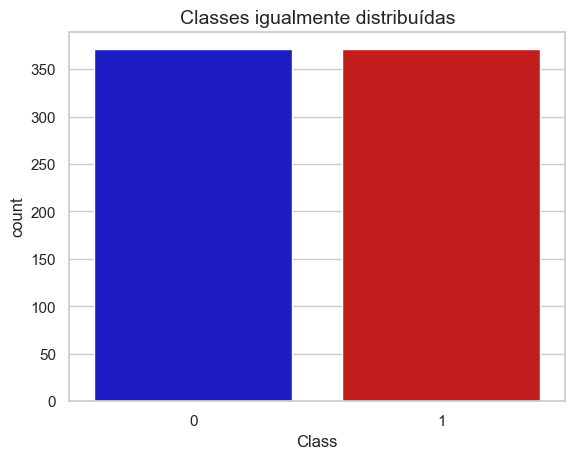

In [453]:
print('Distribuição das Classes no conjunto de dados da subamostra')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', data=new_df, palette=cores)
plt.title('Classes igualmente distribuídas', fontsize=14)
plt.show()

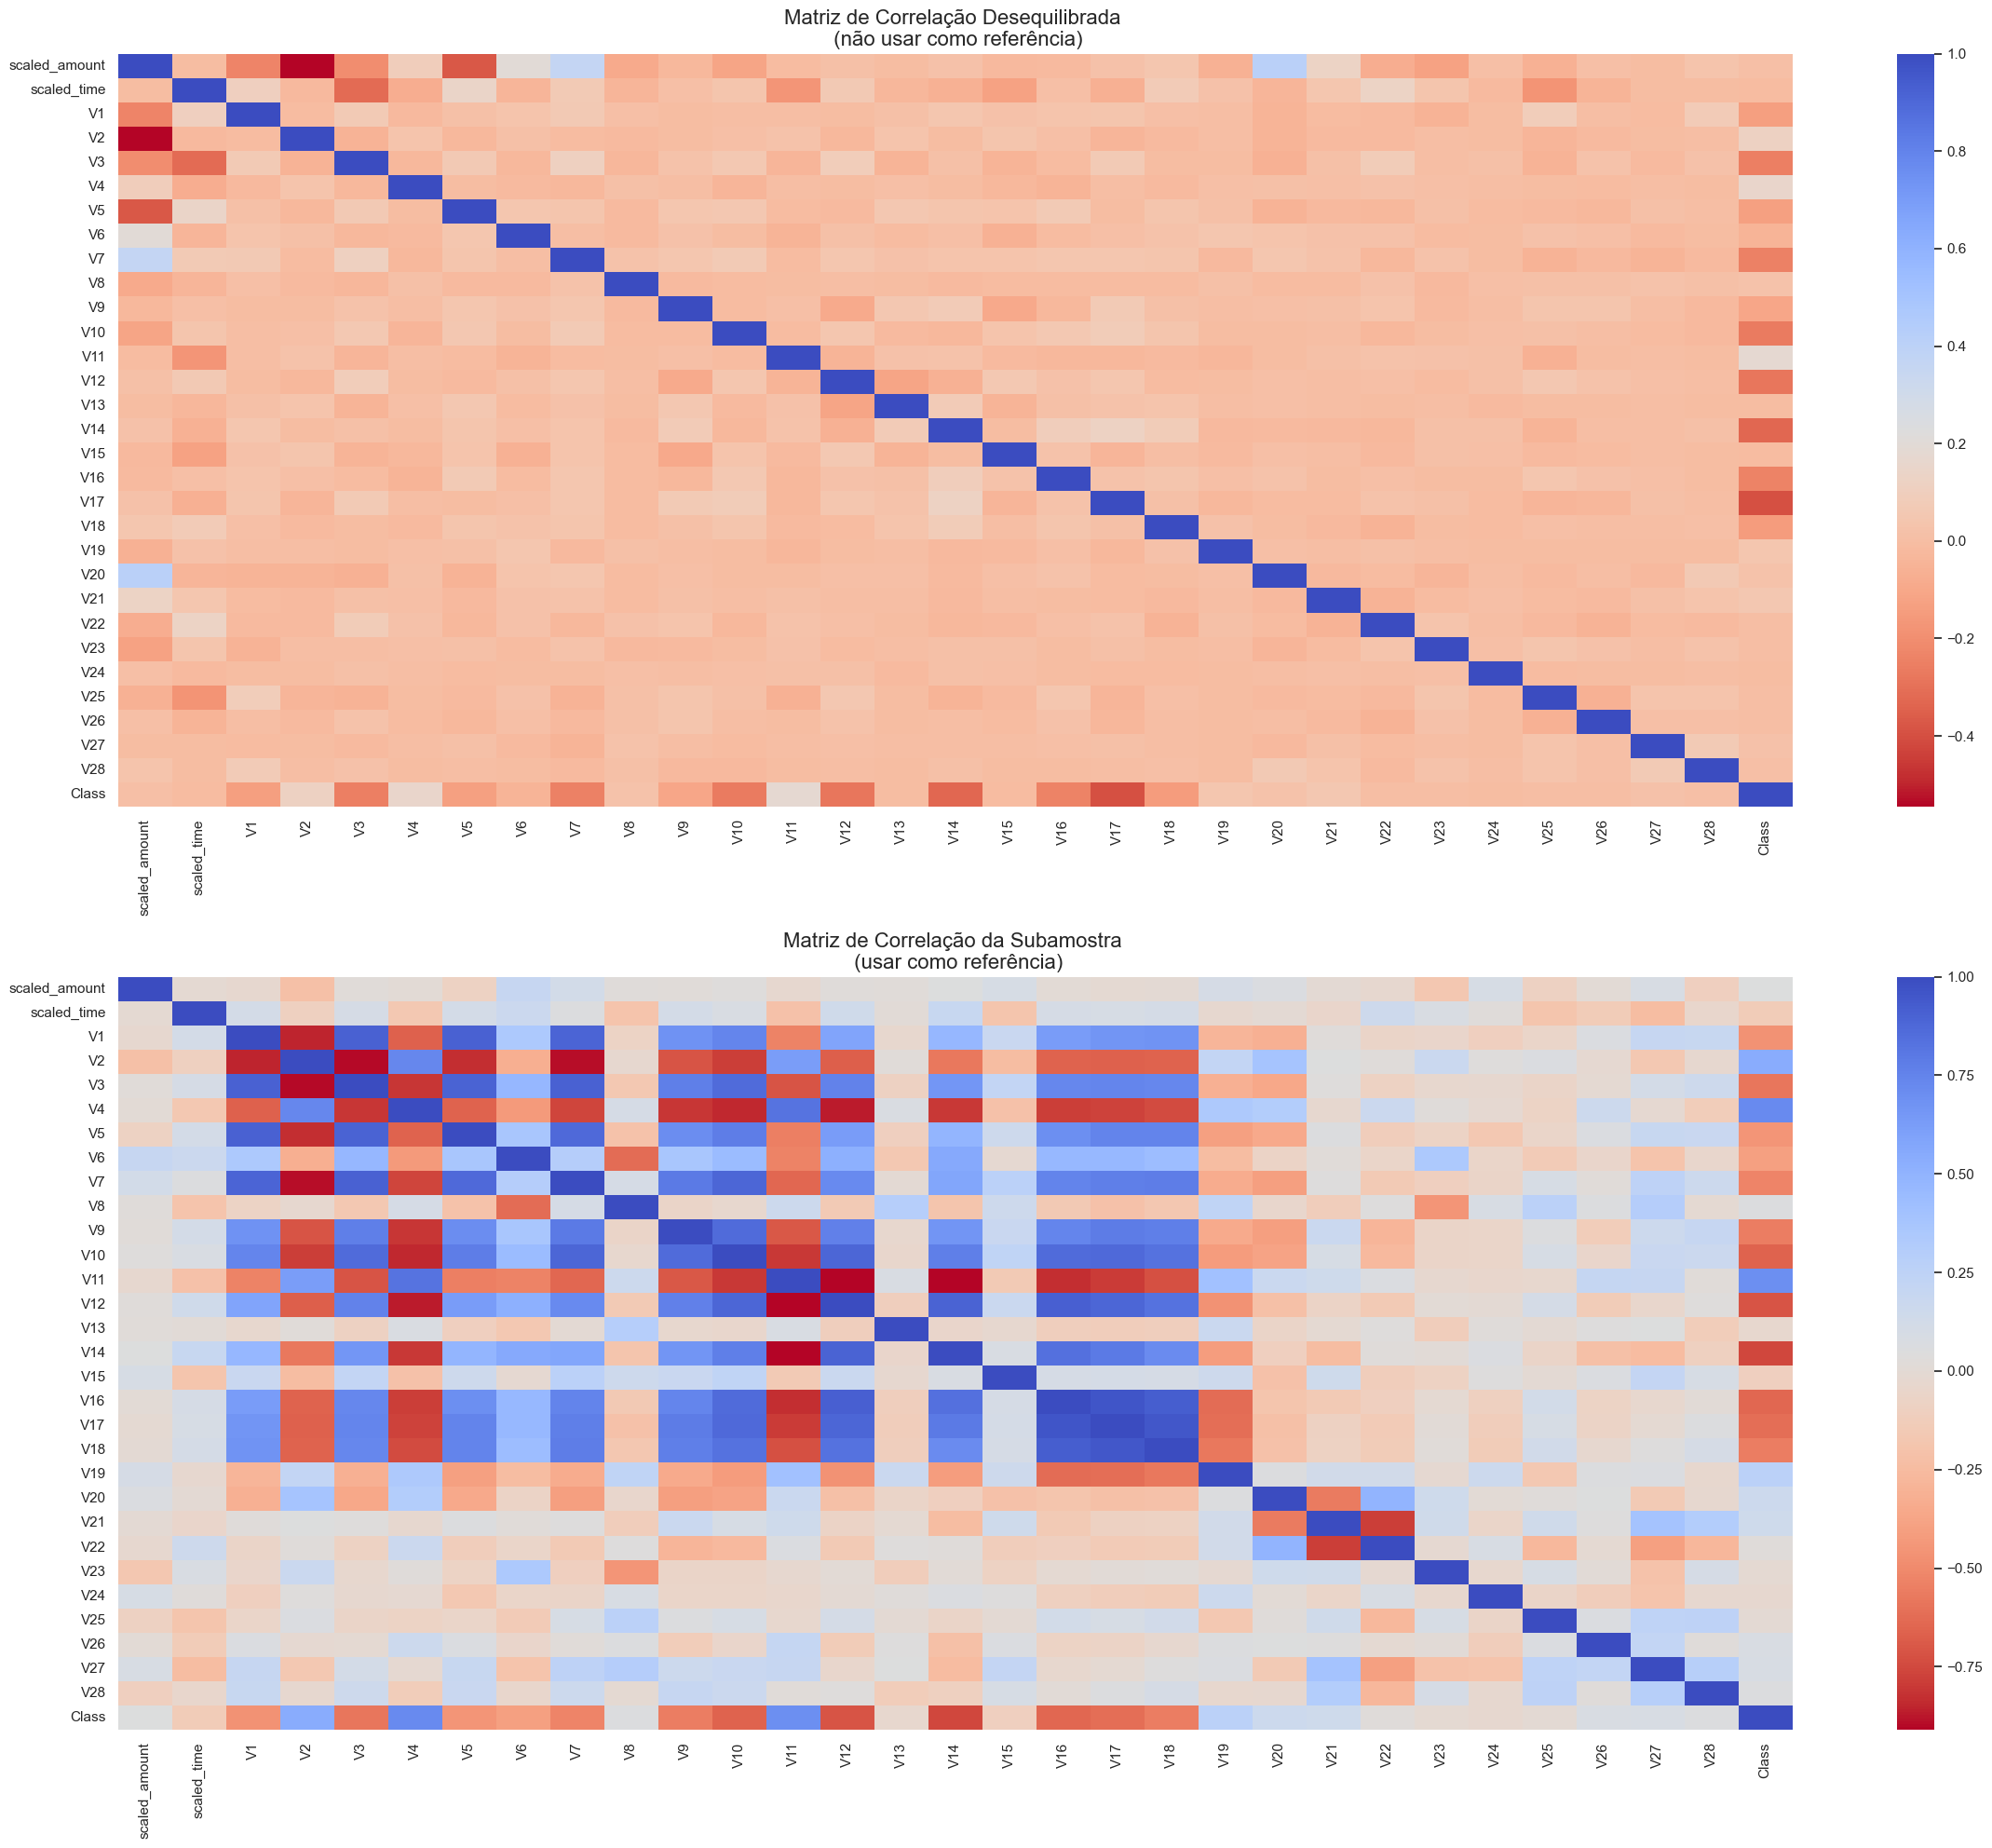

In [454]:
# Configurando o tamanho e os parâmetros do gráfico
fig, axes = plt.subplots(2, 1, figsize=(24, 20))

# Configuração de títulos e fontes para maior clareza
titles = [
    "Matriz de Correlação Desequilibrada \n (não usar como referência)",
    "Matriz de Correlação da Subamostra \n (usar como referência)"
]

# Paleta de cores para o mapa de calor
heatmap_palette = 'coolwarm_r'

# Gerando a matriz de correlação para o DataFrame completo
full_corr = df.corr()
sns.heatmap(
    full_corr,
    cmap=heatmap_palette,
    annot_kws={'size': 20},
    ax=axes[0]
)
axes[0].set_title(titles[0], fontsize=16)

# Gerando a matriz de correlação para o DataFrame balanceado (subamostra)
sub_sample_corr = new_df.corr()
sns.heatmap(
    sub_sample_corr,
    cmap=heatmap_palette,
    annot_kws={'size': 20},
    ax=axes[1]
)
axes[1].set_title(titles[1], fontsize=16)

# Ajustando o layout para melhor visualização
plt.tight_layout()
plt.show()


### Matrizes de Correlação

As matrizes de correlação são fundamentais para compreender os padrões nos dados. Nosso objetivo é identificar características que influenciem fortemente a probabilidade de uma transação ser fraudulenta. Para isso, é essencial utilizarmos o **dataframe balanceado (subamostra)**, garantindo que as correlações reflitam relações reais e não sejam distorcidas pelo desbalanceamento das classes no dataframe original.

#### Resumo e Explicação

- **Correlações Negativas**:
  - As variáveis `V17`, `V14`, `V12` e `V10` apresentam uma forte correlação negativa. Isso significa que, quanto **menores** os valores dessas variáveis, maior a probabilidade de a transação ser fraudulenta.

- **Correlações Positivas**:
  - As variáveis `V2`, `V4`, `V11` e `V19` possuem uma forte correlação positiva. Ou seja, quanto **maiores** os valores dessas variáveis, maior a probabilidade de a transação ser fraudulenta.


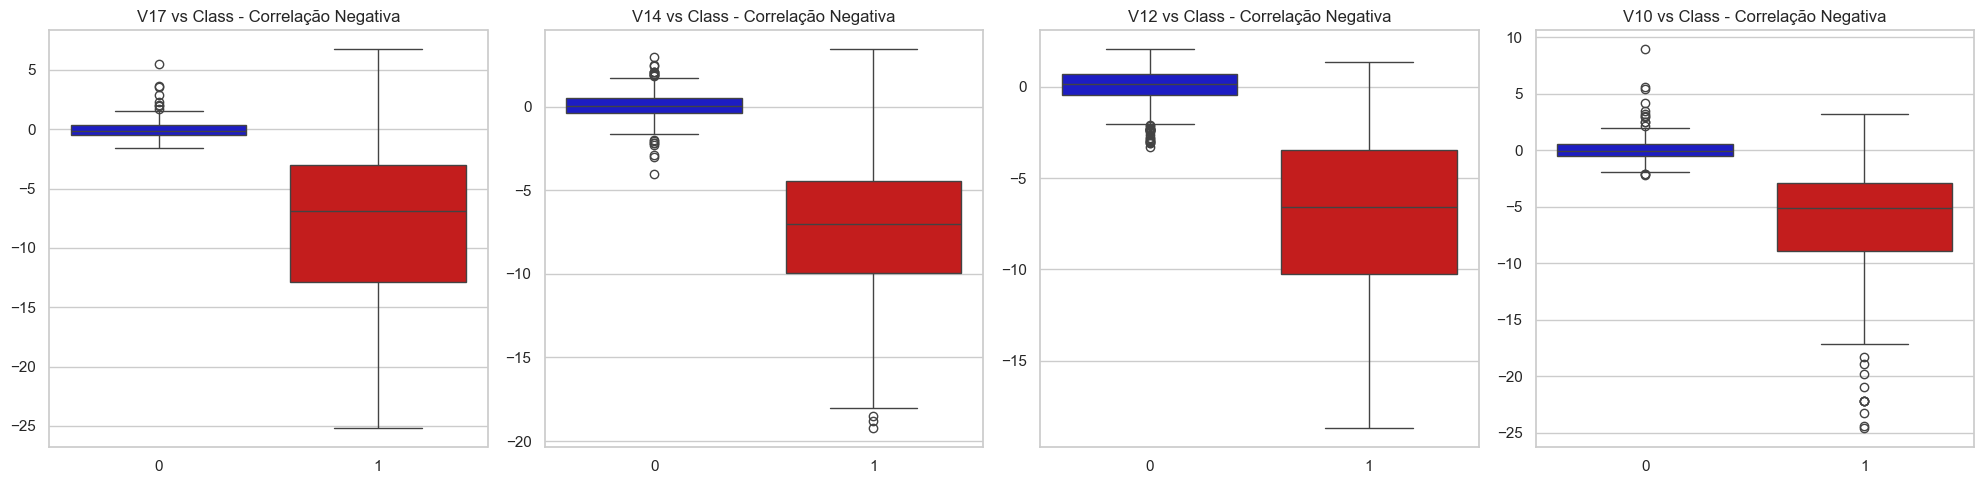

In [455]:
# Configurando os parâmetros da visualização
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
negative_corr_features = ["V17", "V14", "V12", "V10"]
titles = [
    "V17 vs Class - Correlação Negativa",
    "V14 vs Class - Correlação Negativa",
    "V12 vs Class - Correlação Negativa",
    "V10 vs Class - Correlação Negativa"
]

# Gerando os boxplots de forma dinâmica
for i, feature in enumerate(negative_corr_features):
    sns.boxplot(x="Class", y=feature, data=new_df, palette=cores, ax=axes[i])
    axes[i].set_title(titles[i], fontsize=12)
    axes[i].set_xlabel('')  # Remove o título do eixo x para clareza
    axes[i].set_ylabel('')  # Remove o título do eixo y para clareza

# Ajuste do layout para evitar sobreposições
plt.tight_layout()
plt.show()


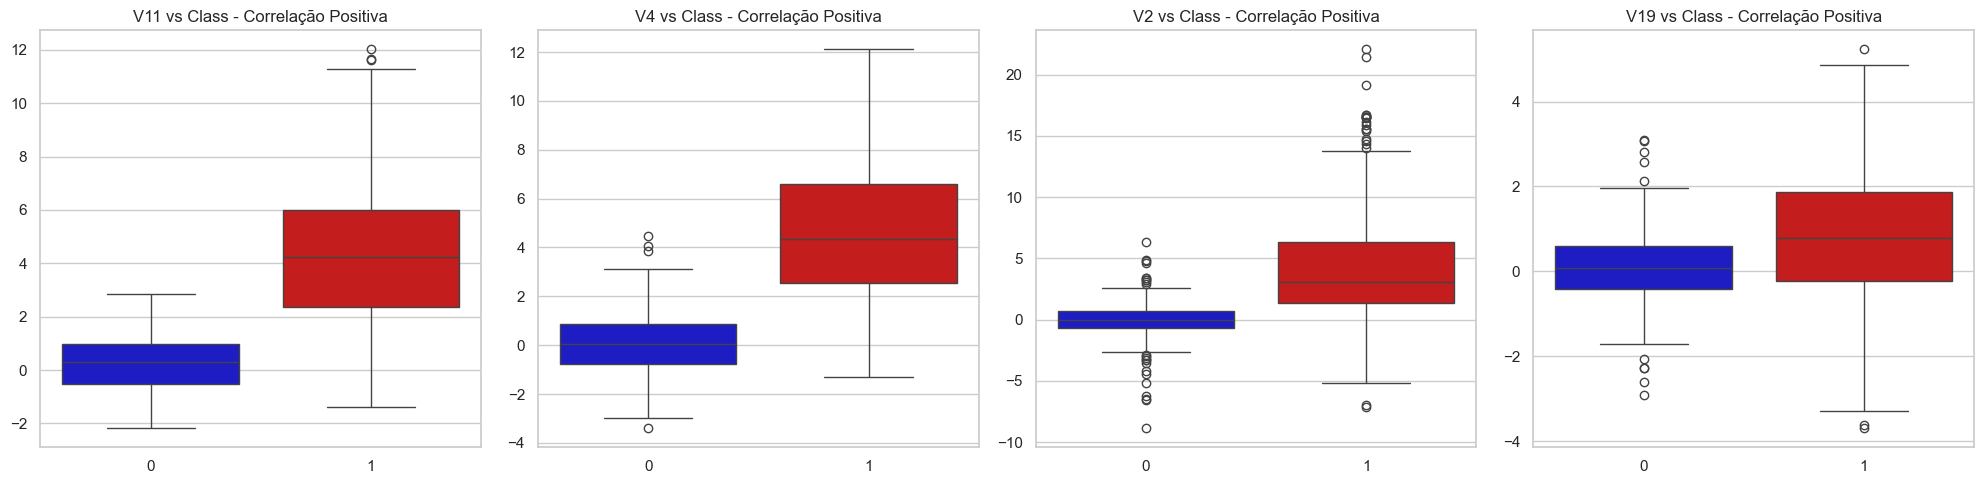

In [456]:
# Configurando os parâmetros da visualização
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
positive_corr_features = ["V11", "V4", "V2", "V19"]
titles = [
            "V11 vs Class - Correlação Positiva",
            "V4 vs Class - Correlação Positiva",
            "V2 vs Class - Correlação Positiva",
            "V19 vs Class - Correlação Positiva"
]

# Gerando os boxplots de forma dinâmica
for i, feature in enumerate(positive_corr_features):
    sns.boxplot(x="Class", y=feature, data=new_df, palette=cores, ax=axes[i])
    axes[i].set_title(titles[i], fontsize=12)
    axes[i].set_xlabel('')  # Remove o rótulo do eixo x para clareza
    axes[i].set_ylabel('')  # Remove o rótulo do eixo y para clareza

# Ajuste do layout para evitar sobreposições
plt.tight_layout()
plt.show()


#### Visualização com Boxplots

Para compreender melhor a distribuição dessas características em transações fraudulentas e não fraudulentas, utilizaremos **boxplots**, que nos permitem visualizar a variação e os outliers de cada variável.

#### Nota Importante

Ao gerar a matriz de correlação, devemos **sempre usar a subamostra balanceada**. Caso contrário, a matriz será influenciada pelo desequilíbrio extremo das classes no dataframe original, o que pode levar a interpretações incorretas das correlações.


# Detecção de Anomalias

Nesta seção, o objetivo é remover **outliers extremos** em recursos com alta correlação com as classes, melhorando a precisão dos modelos.

## Método de Intervalo Interquartil (IQR)
- **Definição**: IQR = Q3 - Q1, onde:
  - Q3: 75º percentil.
  - Q1: 25º percentil.
- **Limites**:
  - Inferior: Q1 - (IQR × K).
  - Superior: Q3 + (IQR × K).
  - **K**: fator de multiplicação (ex.: 1,5 para identificar outliers extremos).

### Visualização com Boxplots
- Mostram percentis e outliers (pontos fora dos limites inferior e superior).
- Identificam visualmente os **outliers extremos**.

## Trade-off na Remoção de Outliers
- **Limites maiores** (K alto): menos outliers removidos.
- **Limites menores** (K baixo): mais outliers removidos, mas com maior perda de dados.
- **Foco**: Remover apenas **outliers extremos** para evitar perdas significativas de informações.

## Passo a Passo
1. **Visualizar distribuições**: Use boxplots para entender os dados.
2. **Calcular limites**: Determine os limites superior e inferior com base no IQR.
3. **Remover outliers**: Exclua instâncias fora dos limites.
4. **Revisar redução**: Verifique com boxplots se os **outliers extremos** foram reduzidos.

## Benefícios
- A precisão aumentou **+3%** após a remoção.
- Melhora a consistência, mas cuidado para não remover dados relevantes, evitando **subajuste**.

## Referência
Mais sobre IQR: *"How to Use Statistics to Identify Outliers in Data"* - Jason Brownlee, *Machine Learning Mastery*.


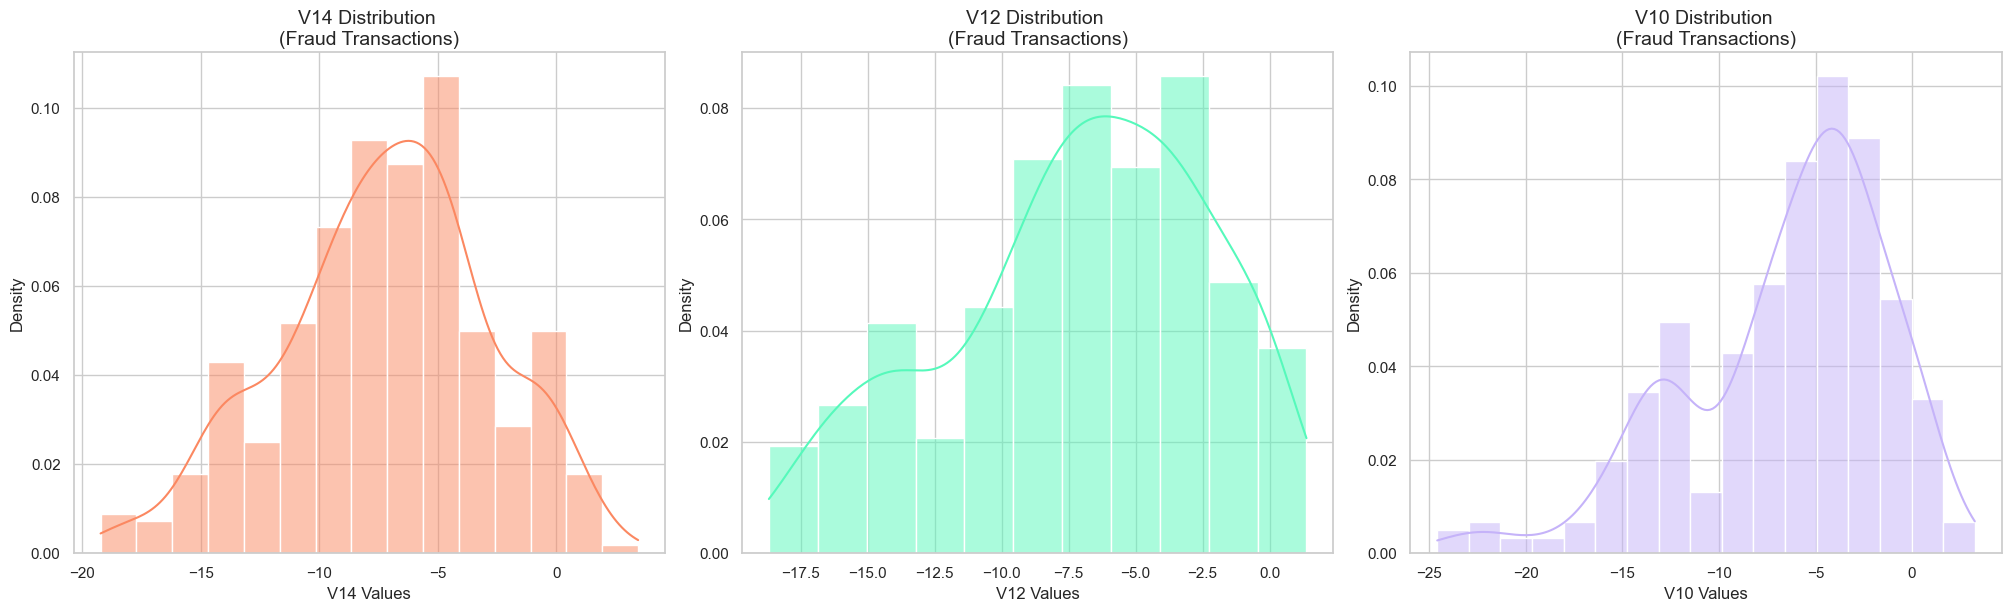

In [457]:
# Configuração do estilo do seaborn para um visual mais limpo
sns.set(style="whitegrid")

# Configurando a figura com subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), constrained_layout=True)

# Distribuição de V14 para transações fraudulentas
v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.histplot(v14_fraud_dist, ax=axes[0], kde=True, stat="density", color='#FB8861', line_kws={"color": "black"})
axes[0].set_title('V14 Distribution \n(Fraud Transactions)', fontsize=14)
axes[0].set_xlabel('V14 Values')
axes[0].set_ylabel('Density')

# Distribuição de V12 para transações fraudulentas
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.histplot(v12_fraud_dist, ax=axes[1], kde=True, stat="density", color='#56F9BB', line_kws={"color": "black"})
axes[1].set_title('V12 Distribution \n(Fraud Transactions)', fontsize=14)
axes[1].set_xlabel('V12 Values')
axes[1].set_ylabel('Density')

# Distribuição de V10 para transações fraudulentas
v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.histplot(v10_fraud_dist, ax=axes[2], kde=True, stat="density", color='#C5B3F9', line_kws={"color": "black"})
axes[2].set_title('V10 Distribution \n(Fraud Transactions)', fontsize=14)
axes[2].set_xlabel('V10 Values')
axes[2].set_ylabel('Density')

# Exibir o gráfico
plt.show()

In [458]:
def remove_outliers(df, feature, label_column, label_value, multiplier=1.5):
    """
    Remove outliers de uma feature baseada no método do intervalo interquartil (IQR).
    
    Args:
        df (DataFrame): DataFrame contendo os dados.
        feature (str): Nome da feature para analisar e remover outliers.
        label_column (str): Coluna de rótulos para filtrar os dados (e.g., "Class").
        label_value (int/float): Valor do rótulo para filtrar (e.g., 1 para transações fraudulentas).
        multiplier (float): Multiplicador para o IQR (default=1.5).
    
    Returns:
        DataFrame: DataFrame com os outliers removidos.
    """
    feature_values = df[feature].loc[df[label_column] == label_value].values
    q25, q75 = np.percentile(feature_values, 25), np.percentile(feature_values, 75)
    iqr = q75 - q25
    cut_off = iqr * multiplier
    lower_bound, upper_bound = q25 - cut_off, q75 + cut_off
    
    print(f"---- {feature} Remoção de Outliers ----")
    print(f"Q25: {q25} | Q75: {q75}")
    print(f"IQR: {iqr}")
    print(f"Cortar: {cut_off}")
    print(f"Limite Inferior: {lower_bound} | Limite superior: {upper_bound}")
    
    # Identificar e contar outliers
    outliers = [x for x in feature_values if x < lower_bound or x > upper_bound]
    print(f"Número de outliers: {len(outliers)}")
    print(f"Outliers: {outliers}\n")
    
    # Remover outliers
    df = df.drop(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index)
    return df

# Aplicar a função para remover outliers nas features V14, V12 e V10
new_df = remove_outliers(new_df, feature='V14', label_column='Class', label_value=1)
new_df = remove_outliers(new_df, feature='V12', label_column='Class', label_value=1)
new_df = remove_outliers(new_df, feature='V10', label_column='Class', label_value=1)

print(f"Número final de instâncias: {len(new_df)}")

---- V14 Remoção de Outliers ----
Q25: -9.922423817651886 | Q75: -4.459973118510391
IQR: 5.462450699141495
Cortar: 8.193676048712243
Limite Inferior: -18.11609986636413 | Limite superior: 3.7337029302018525
Número de outliers: 3
Outliers: [np.float64(-18.8220867423816), np.float64(-19.2143254902614), np.float64(-18.4937733551053)]

---- V12 Remoção de Outliers ----
Q25: -10.147895779015151 | Q75: -3.4497671416630524
IQR: 6.698128637352099
Cortar: 10.047192956028148
Limite Inferior: -20.1950887350433 | Limite superior: 6.597425814365096
Número de outliers: 0
Outliers: []

---- V10 Remoção de Outliers ----
Q25: -8.7569102997176 | Q75: -2.8943957408408
IQR: 5.8625145588768
Cortar: 8.7937718383152
Limite Inferior: -17.550682138032798 | Limite superior: 5.8993760974744
Número de outliers: 11
Outliers: [np.float64(-18.9132433348732), np.float64(-22.1870885620007), np.float64(-18.2711681738888), np.float64(-22.1870885620007), np.float64(-19.836148851696), np.float64(-22.1870885620007), np.flo

In [459]:
def remover_outliers(df, feature, coluna_rotulo, valor_rotulo, multiplicador=1.5):
    """
    Remove outliers de uma feature baseada no método do intervalo interquartil (IQR).
    
    Args:
        df (DataFrame): DataFrame contendo os dados.
        feature (str): Nome da feature para analisar e remover outliers.
        coluna_rotulo (str): Coluna de rótulos para filtrar os dados (exemplo: "Class").
        valor_rotulo (int/float): Valor do rótulo para filtrar (exemplo: 1 para transações fraudulentas).
        multiplicador (float): Multiplicador para o IQR (padrão=1.5).
    
    Returns:
        DataFrame: DataFrame com os outliers removidos.
    """
    valores_feature = df[feature].loc[df[coluna_rotulo] == valor_rotulo].values
    q25, q75 = np.percentile(valores_feature, 25), np.percentile(valores_feature, 75)
    iqr = q75 - q25
    corte = iqr * multiplicador
    limite_inferior, limite_superior = q25 - corte, q75 + corte
    
    print(f"---- Remoção de Outliers - {feature} ----")
    print(f"Q25: {q25} | Q75: {q75}")
    print(f"IQR: {iqr}")
    print(f"Corte: {corte}")
    print(f"Limite Inferior: {limite_inferior} | Limite Superior: {limite_superior}")
    print(f"Lower: {limite_inferior}")
    print(f"Upper: {limite_superior}")
    
    # Identificar e contar outliers
    outliers = [x for x in valores_feature if x < limite_inferior or x > limite_superior]
    print(f"Número de Outliers: {len(outliers)}")
    print(f"Outliers: {outliers}\n")
    
    # Remover outliers
    df = df.drop(df[(df[feature] < limite_inferior) | (df[feature] > limite_superior)].index)
    return df

# Aplicar a função para remover outliers nas features V14, V12 e V10
new_df = remover_outliers(new_df, feature='V14', coluna_rotulo='Class', valor_rotulo=1)
new_df = remover_outliers(new_df, feature='V12', coluna_rotulo='Class', valor_rotulo=1)
new_df = remover_outliers(new_df, feature='V10', coluna_rotulo='Class', valor_rotulo=1)

print(f"Número final de instâncias: {len(new_df)}")


---- Remoção de Outliers - V14 ----
Q25: -9.93567958156078 | Q75: -4.60379669207464
IQR: 5.33188288948614
Corte: 7.99782433422921
Limite Inferior: -17.93350391578999 | Limite Superior: 3.39402764215457
Lower: -17.93350391578999
Upper: 3.39402764215457
Número de Outliers: 2
Outliers: [np.float64(3.44242199594215), np.float64(-18.0499976898594)]

---- Remoção de Outliers - V12 ----
Q25: -9.551274871230385 | Q75: -3.368220806769255
IQR: 6.18305406446113
Corte: 9.274581096691694
Limite Inferior: -18.82585596792208 | Limite Superior: 5.906360289922439
Lower: -18.82585596792208
Upper: 5.906360289922439
Número de Outliers: 0
Outliers: []

---- Remoção de Outliers - V10 ----
Q25: -8.40966487562735 | Q75: -2.853220365687175
IQR: 5.5564445099401745
Corte: 8.334666764910262
Limite Inferior: -16.74433164053761 | Limite Superior: 5.481446399223087
Lower: -16.74433164053761
Upper: 5.481446399223087
Número de Outliers: 2
Outliers: [np.float64(-16.7460441053944), np.float64(-17.1415136412892)]

Número

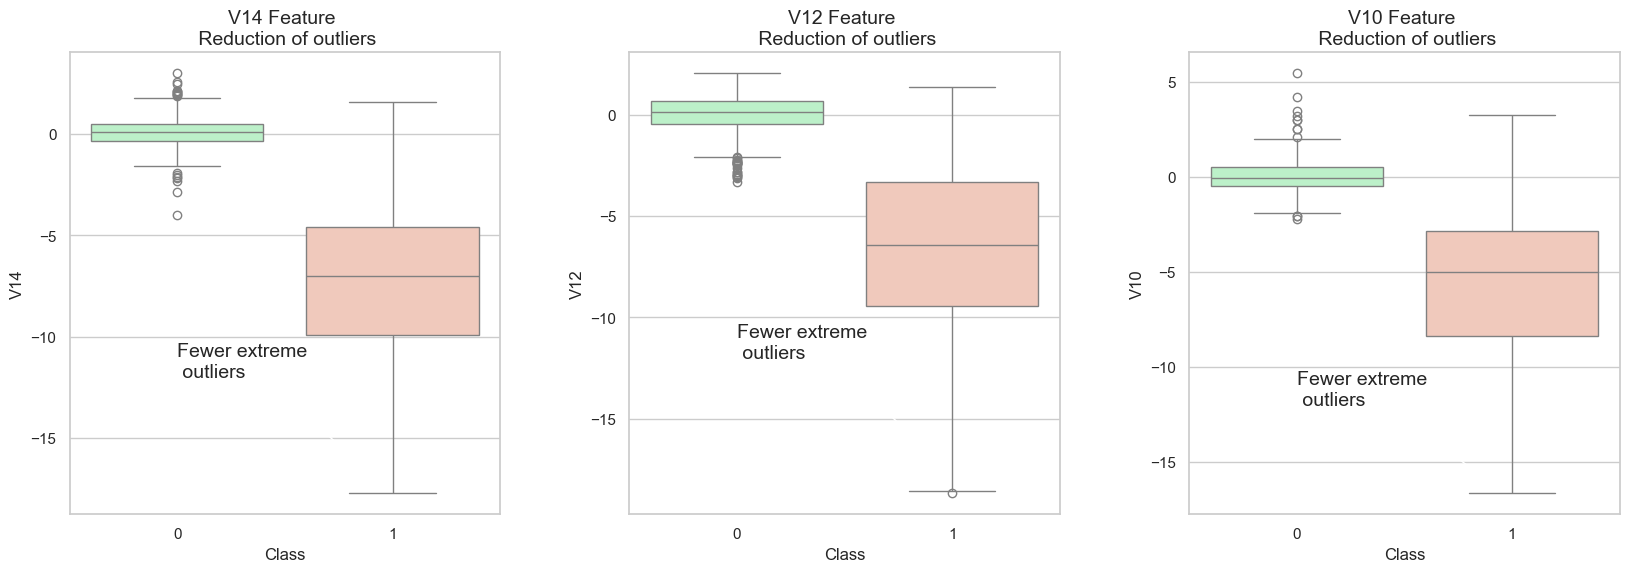

In [460]:
# Função para criar boxplots.
def criar_boxplot(ax, feature, dados, cores, titulo, anotacao_texto, posicao_anotacao):
    sns.boxplot(x="Class", y=feature, data=dados, ax=ax, palette=cores)
    ax.set_title(titulo, fontsize=14)
    ax.annotate(anotacao_texto, xy=posicao_anotacao[0], xytext=posicao_anotacao[1],
                arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14)

# Criar figura com 3 subgráficos.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Definir cores para os boxplots.
cores = ['#B3F9C5', '#f9c5b3']

# Boxplot para V14.
criar_boxplot(ax1, 'V14', new_df, cores, 
              "V14 Feature \n Reduction of outliers", 
              'Fewer extreme \n outliers', 
              [(0.98, -17.5), (0, -12)])

# Boxplot para V12.
criar_boxplot(ax2, 'V12', new_df, cores, 
              "V12 Feature \n Reduction of outliers", 
              'Fewer extreme \n outliers', 
              [(0.98, -17.3), (0, -12)])

# Boxplot para V10.
criar_boxplot(ax3, 'V10', new_df, cores, 
              "V10 Feature \n Reduction of outliers", 
              'Fewer extreme \n outliers', 
              [(0.95, -16.5), (0, -12)])

# Ajustar espaçamento entre os subgráficos.
plt.subplots_adjust(wspace=0.3)

# Exibir o gráfico.
plt.show()

# Redução de Dimensionalidade e Agrupamento

## Entendendo o t-SNE

O **t-SNE (t-Distributed Stochastic Neighbor Embedding)** é um algoritmo utilizado para redução de dimensionalidade, que preserva a estrutura local dos dados, agrupando pontos semelhantes.

### Termos Importantes:

Para entender o funcionamento do t-SNE, é necessário compreender alguns conceitos-chave:

- **Distância Euclidiana**: Mede a distância entre dois pontos no espaço, importante para avaliar a similaridade.
- **Probabilidade Condicional**: A probabilidade de um ponto pertencer a um grupo específico dado o outro ponto.
- **Distribuição Normal e t**: t-SNE utiliza essas distribuições para modelar a similaridade entre os pontos, com a distribuição t sendo mais robusta a outliers.

### Observação:
Se você estiver buscando uma explicação visual e simplificada, recomendo assistir ao vídeo **StatQuest: t-SNE**, explicado claramente por **Joshua Starmer**.

## Resumo

O algoritmo **t-SNE** demonstrou um desempenho notável em nosso conjunto de dados, agrupando com bastante precisão os casos de **fraude** e **não fraude**. Aqui estão alguns pontos importantes:

- Embora a subamostra usada seja pequena, o t-SNE consegue identificar clusters de forma eficaz, mesmo quando embaralhamos o conjunto de dados antes de rodar o algoritmo.
- Esse comportamento sugere que, ao utilizar outros modelos preditivos, teremos um desempenho igualmente bom na separação entre os casos de fraude e os de não fraude.

Isso indica que o t-SNE pode ser uma ferramenta útil não apenas para visualização, mas também para confirmar a viabilidade de modelos de predição de fraude.


In [461]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Preparação dos dados
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Função para aplicar e medir o tempo de execução das técnicas de redução de dimensionalidade
def aplicar_reducao_dimensionalidade(modelo, X, nome):
    tempo_inicial = time.time()
    X_reduzido = modelo.fit_transform(X)
    tempo_final = time.time()
    print(f"{nome} levou {tempo_final - tempo_inicial:.2f} s")
    return X_reduzido

# Implementação do T-SNE
modelo_tsne = TSNE(n_components=2, random_state=42)
X_reduzido_tsne = aplicar_reducao_dimensionalidade(modelo_tsne, X, 'T-SNE')

# Implementação do PCA
modelo_pca = PCA(n_components=2, random_state=42)
X_reduzido_pca = aplicar_reducao_dimensionalidade(modelo_pca, X, 'PCA')

# Implementação do TruncatedSVD
modelo_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42)
X_reduzido_svd = aplicar_reducao_dimensionalidade(modelo_svd, X, 'Truncated SVD')

T-SNE levou 1.80 s
PCA levou 0.00 s
Truncated SVD levou 0.00 s


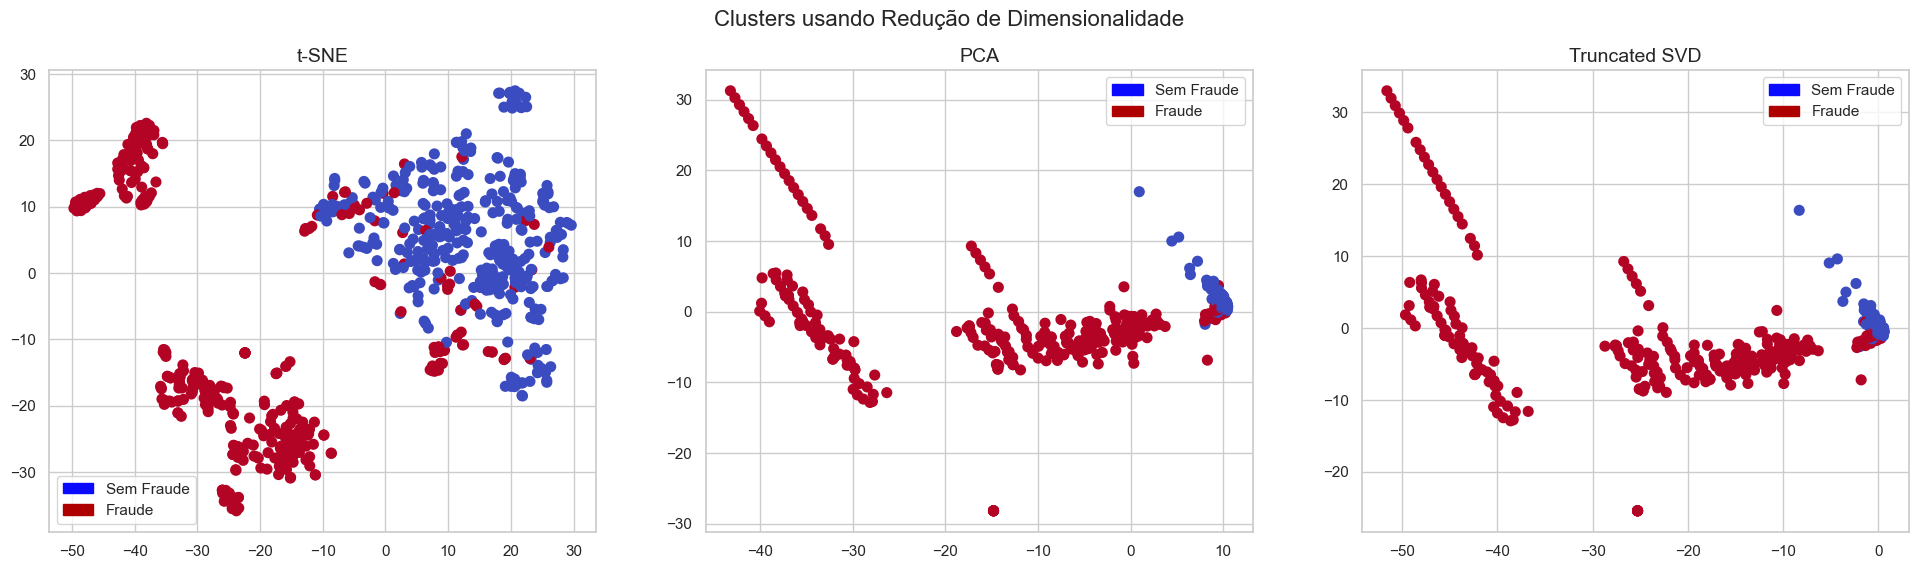

In [462]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Função para criar scatter plot
def criar_scatter_plot(ax, X_reduzido, y, titulo, blue_patch, red_patch):
    scatter = ax.scatter(X_reduzido[:, 0], X_reduzido[:, 1], c=y, cmap='coolwarm', linewidths=2)
    ax.set_title(titulo, fontsize=14)
    ax.grid(True)
    ax.legend(handles=[blue_patch, red_patch])
    return scatter

# Criando o gráfico
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Clusters usando Redução de Dimensionalidade', fontsize=16)

# Definindo as cores para a legenda
blue_patch = mpatches.Patch(color='#0A0AFF', label='Sem Fraude')
red_patch = mpatches.Patch(color='#AF0000', label='Fraude')

# Plot do t-SNE
criar_scatter_plot(ax1, X_reduzido_tsne, y, 't-SNE', blue_patch, red_patch)

# Plot do PCA
criar_scatter_plot(ax2, X_reduzido_pca, y, 'PCA', blue_patch, red_patch)

# Plot do TruncatedSVD
criar_scatter_plot(ax3, X_reduzido_svd, y, 'Truncated SVD', blue_patch, red_patch)

# Exibindo o gráfico
plt.show()

# Classificadores (UnderSampling)

Nesta seção, treinaremos quatro tipos de classificadores para identificar qual deles é mais eficaz na detecção de transações fraudulentas. Para isso, começamos dividindo nossos dados em conjuntos de treinamento e teste, e separando os recursos (features) dos rótulos (labels).

## Resumo

- O **classificador Regressão Logística (Logistic Regression)** demonstrou ser mais preciso do que os outros três classificadores na maioria dos casos. Vamos analisar este modelo com mais detalhes.
  
- Utilizamos o **GridSearchCV** para determinar os parâmetros que fornecem a melhor pontuação preditiva para cada classificador.

- O **Logistic Regression** apresentou a melhor pontuação na **Receiving Operating Characteristic (ROC)**, o que significa que ele é muito eficaz para separar transações fraudulentas de não fraudulentas.

## Curvas de Aprendizado

- **Lacuna entre a pontuação de treinamento e a pontuação de validação cruzada**: 
  - Quanto maior a diferença entre essas pontuações, maior a probabilidade de o modelo estar **superajustado** (alto viés), o que significa que ele está se ajustando demais aos dados de treinamento.
  
- **Pontuações baixas nos conjuntos de treinamento e validação cruzada** indicam que o modelo pode estar **subajustado** (alta variância), ou seja, não está aprendendo o suficiente a partir dos dados.

- O **Classificador de Regressão Logística** apresentou as melhores pontuações tanto nos conjuntos de treinamento quanto na validação cruzada, demonstrando um bom equilíbrio entre viés e variância.

## Conclusão

A **Regressão Logística** se destacou como o classificador mais eficaz para a detecção de fraudes no conjunto de dados, tanto em termos de precisão quanto de separação entre as classes (fraude e não fraude).


In [463]:
# Subamostragem antes da validação cruzada (propenso a overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [464]:
# Nossos dados já estão dimensionados, devemos dividir nossos conjuntos de treinamento e teste.
from sklearn.model_selection import train_test_split

# Isso é usado explicitamente para subamostragem.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [465]:
# Transforme os valores em uma matriz para alimentar os algoritmos de classificação.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [466]:
# Vamos implementar classificadores simples

classificadores = {
"LogisiticRegression": LogisticRegression(),
"KNearest": KNeighborsClassifier(),
"Classificador de vetores de suporte": SVC(),
"DecisionTreeClassifier": DecisionTreeClassifier()
}

In [467]:
from sklearn.model_selection import cross_val_score

# Itera sobre todos os classificadores no dicionário 'classificadores'
for name, classifier in classificadores.items():
    # Realiza a validação cruzada (5 folds) e calcula a pontuação média
    training_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
    
    # Exibe o nome do classificador e sua pontuação média de precisão
    print(f"Classificador: {name} - Pontuação de Precisão de Treinamento: {round(training_scores.mean() * 100, 2)}%")


Classificador: LogisiticRegression - Pontuação de Precisão de Treinamento: 94.81%
Classificador: KNearest - Pontuação de Precisão de Treinamento: 93.76%
Classificador: Classificador de vetores de suporte - Pontuação de Precisão de Treinamento: 93.07%
Classificador: DecisionTreeClassifier - Pontuação de Precisão de Treinamento: 91.16%


In [468]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Função para realizar a GridSearchCV e retornar o melhor estimador
def perform_grid_search(classifier, params, X_train, y_train):
    grid_search = GridSearchCV(classifier, params, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Definir os parâmetros para cada classificador
params = {
    'log_reg': {
        "penalty": ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    'knears': {
        "n_neighbors": list(range(2, 5)),
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'svc': {
        'C': [0.5, 0.7, 0.9, 1],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
    },
    'tree': {
        "criterion": ["gini", "entropy"],
        "max_depth": list(range(2, 4)),
        "min_samples_leaf": list(range(5, 7))
    }
}

# Executar GridSearchCV para cada classificador e obter o melhor estimador
log_reg = perform_grid_search(LogisticRegression(), params['log_reg'], X_train, y_train)
knears_neighbors = perform_grid_search(KNeighborsClassifier(), params['knears'], X_train, y_train)
svc = perform_grid_search(SVC(), params['svc'], X_train, y_train)
tree_clf = perform_grid_search(DecisionTreeClassifier(), params['tree'], X_train, y_train)

# Exibir os melhores modelos encontrados
print(f"Melhor classificador para Logistic Regression: {log_reg}")
print(f"Melhor classificador para KNeighbors: {knears_neighbors}")
print(f"Melhor classificador para SVC: {svc}")
print(f"Melhor classificador para Decision Tree: {tree_clf}")


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Melhor classificador para Logistic Regression: LogisticRegression(C=1)
Melhor classificador para KNeighbors: KNeighborsClassifier(n_neighbors=3)
Melhor classificador para SVC: SVC(C=0.5, kernel='linear')
Melhor classificador para Decision Tree: DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)


In [469]:
from sklearn.model_selection import cross_val_score

# Função para calcular e exibir a pontuação de validação cruzada
def evaluate_model(model, X_train, y_train, model_name):
    score = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1)
    mean_score = round(score.mean() * 100, 2)
    print(f'{model_name} - Cross Validation Score: {mean_score}%')

# Avaliação dos classificadores
evaluate_model(log_reg, X_train, y_train, 'Logistic Regression')
evaluate_model(knears_neighbors, X_train, y_train, 'K-Nearest Neighbors')
evaluate_model(svc, X_train, y_train, 'Support Vector Classifier')
evaluate_model(tree_clf, X_train, y_train, 'Decision Tree Classifier')


Logistic Regression - Cross Validation Score: 94.81%
K-Nearest Neighbors - Cross Validation Score: 94.28%
Support Vector Classifier - Cross Validation Score: 94.63%
Decision Tree Classifier - Cross Validation Score: 92.38%


In [470]:
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline
from collections import Counter

# Define a estratégia de validação cruzada
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Preparando os dados
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

# Função para realizar NearMiss e validação cruzada
def cross_validate_with_nearmiss(X, y, model, sss, sampler=NearMiss(sampling_strategy='majority')):
    accuracy, precision, recall, f1, auc = [], [], [], [], []
    
    # Implementando NearMiss durante a validação cruzada
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Usando o NearMiss no pipeline
        pipeline = make_pipeline(sampler, model)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        # Calculando as métricas de avaliação
        accuracy.append(pipeline.score(X_test, y_test))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))
        auc.append(roc_auc_score(y_test, y_pred))
    
    return accuracy, precision, recall, f1, auc

# Exibindo a distribuição de rótulos do NearMiss (apenas para visualização)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X, undersample_y)
print(f'Distribuição de rótulos do NearMiss: {Counter(y_nearmiss)}')

# Realizando validação cruzada com NearMiss e Regressão Logística
log_reg = LogisticRegression()  # Ou qualquer modelo que você queira usar
accuracy, precision, recall, f1, auc = cross_validate_with_nearmiss(undersample_X, undersample_y, log_reg, sss)

# Exibindo os resultados
print(f'Regressão Logística - Acurácia: {round(np.mean(accuracy) * 100, 2)}%')
print(f'Regressão Logística - Precisão: {round(np.mean(precision) * 100, 2)}%')
print(f'Regressão Logística - Recall: {round(np.mean(recall) * 100, 2)}%')
print(f'Regressão Logística - F1 Score: {round(np.mean(f1) * 100, 2)}%')
print(f'Regressão Logística - AUC: {round(np.mean(auc) * 100, 2)}%')


Distribuição de rótulos do NearMiss: Counter({0: 371, 1: 371})
Regressão Logística - Acurácia: 55.61%
Regressão Logística - Precisão: 0.43%
Regressão Logística - Recall: 93.78%
Regressão Logística - F1 Score: 0.85%
Regressão Logística - AUC: 74.66%


In [471]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimators, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Função para plotar as curvas de aprendizado de múltiplos estimadores.
    
    Parâmetros:
    - estimators: lista de estimadores (modelos) para os quais as curvas de aprendizado serão plotadas.
    - X: Conjunto de dados de entrada.
    - y: Rótulos dos dados.
    - ylim: Limites do gráfico (opcional).
    - cv: Número de divisões de validação cruzada (opcional).
    - n_jobs: Número de trabalhos paralelos (padrão: 1).
    - train_sizes: Tamanhos do conjunto de treino para calcular a curva (padrão: 10% a 100%).
    
    Retorna:
    - plt: A instância do gráfico gerado.
    """
    
    # Definindo o layout da figura (2x2) para os gráficos
    f, axs = plt.subplots(2, 2, figsize=(20, 14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    
    # Iterando sobre os estimadores
    for idx, estimator in enumerate(estimators):
        # Dividindo o índice para identificar o gráfico a ser preenchido
        ax = axs[idx // 2, idx % 2]
        
        # Calculando as curvas de aprendizado
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        
        # Calculando as médias e desvios padrões
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        # Preenchendo a área entre o desvio padrão para visualização
        ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
        ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
        
        # Plotando as curvas de aprendizado
        ax.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Treinamento")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Validação cruzada")
        
        # Configurações do gráfico
        estimator_name = estimator.__class__.__name__
        ax.set_title(f"{estimator_name} Learning Curve", fontsize=14)
        ax.set_xlabel('Tamanho do treinamento (m)')
        ax.set_ylabel('Score')
        ax.grid(True)
        ax.legend(loc="best")
    
    # Ajustando a disposição dos subgráficos
    plt.tight_layout()
    return plt


<module 'matplotlib.pyplot' from 'c:\\Projetos\\Intelligent Credit Fraud Detection Model\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

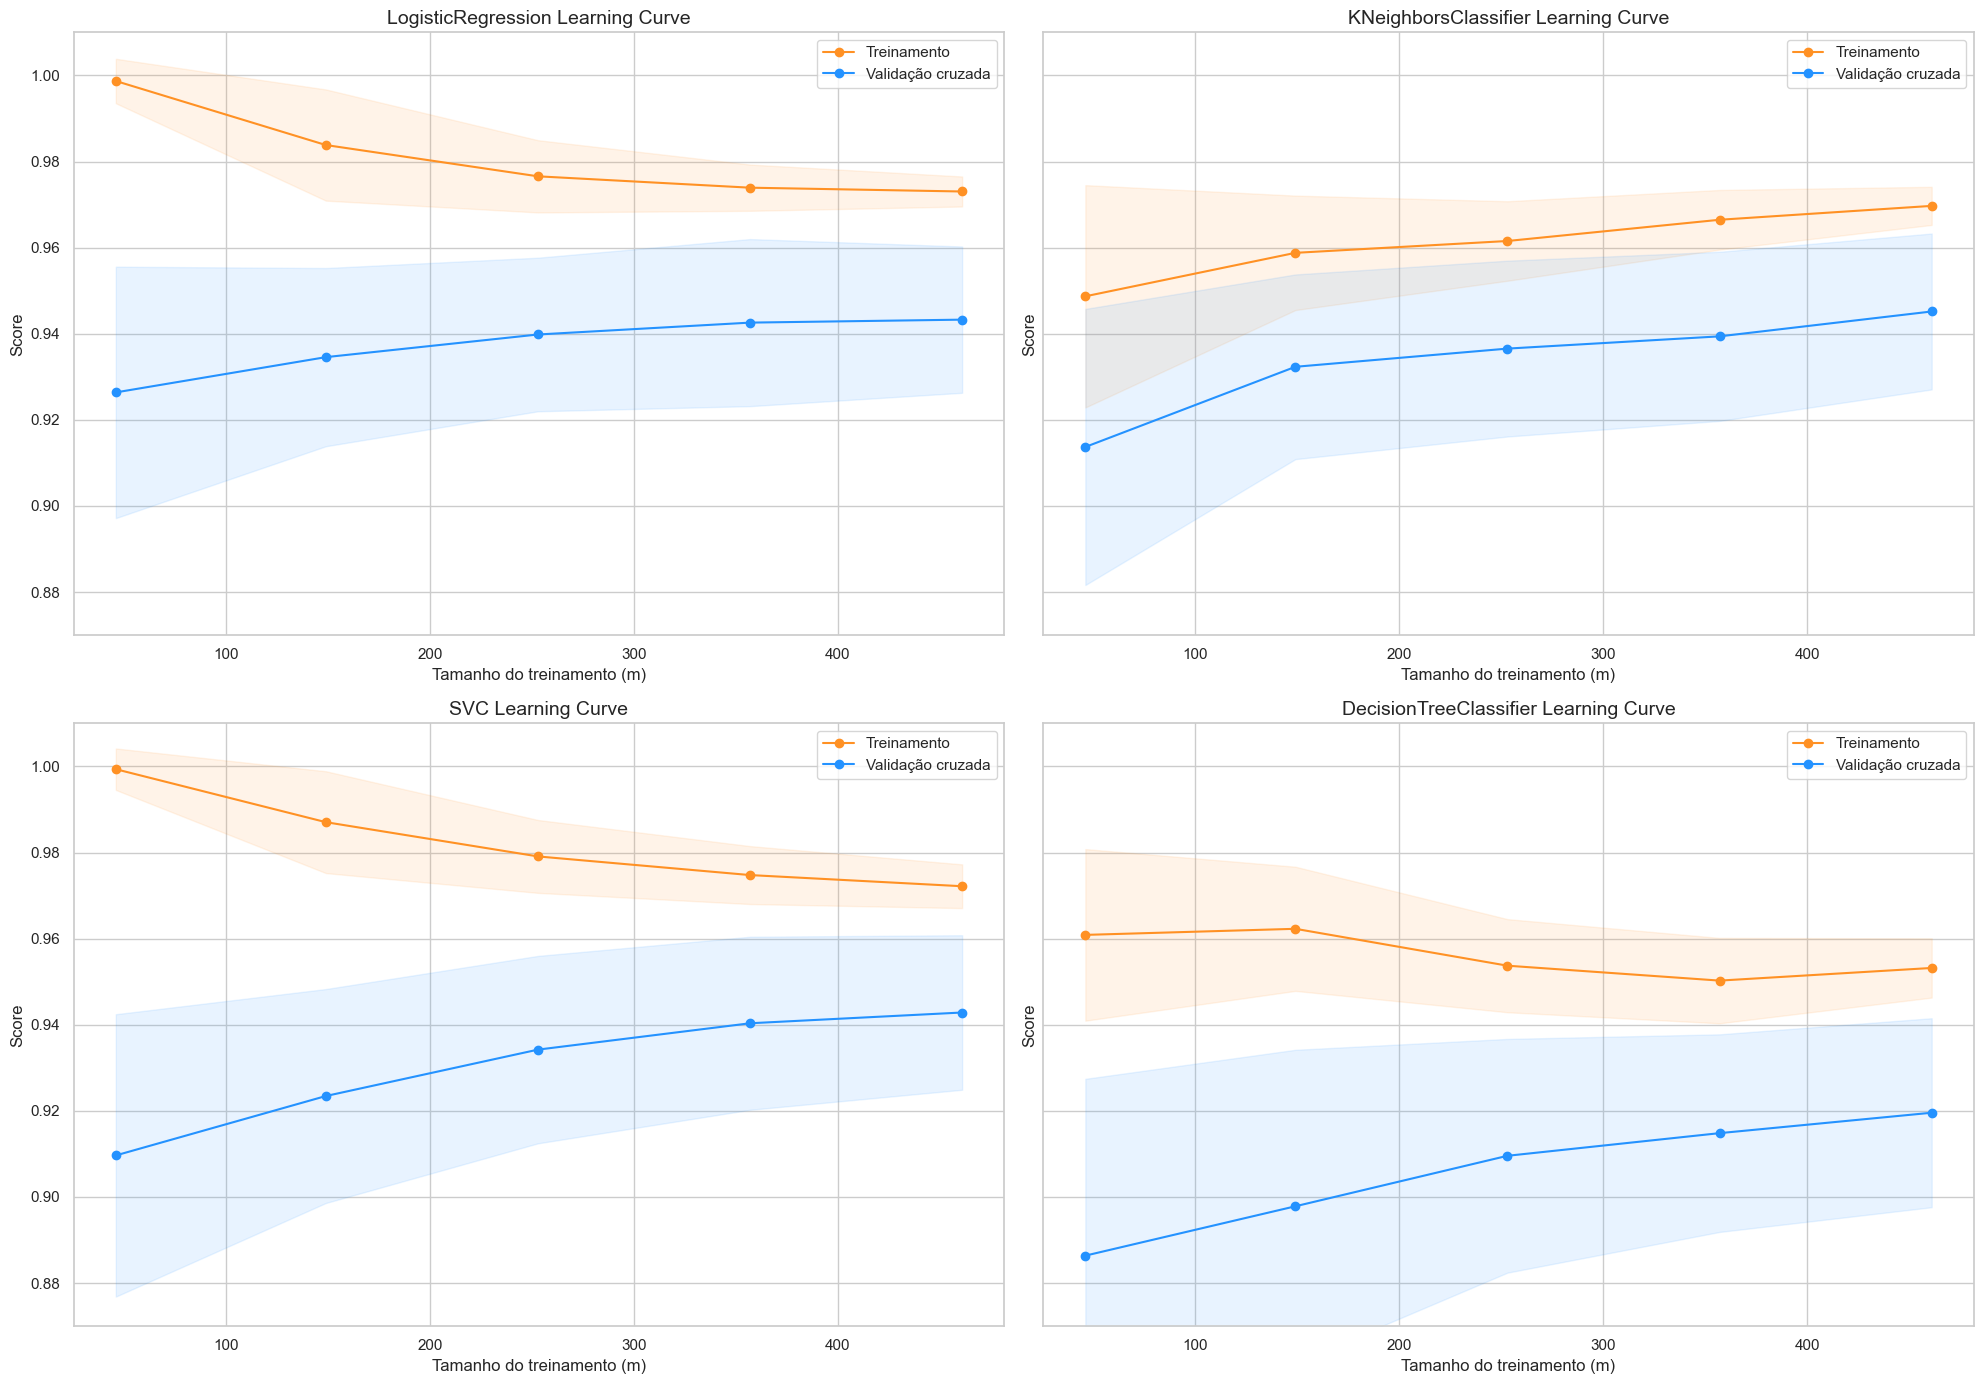

In [472]:
from sklearn.model_selection import ShuffleSplit

# Definindo os estimadores
estimators = [log_reg, knears_neighbors, svc, tree_clf]

# Definindo a validação cruzada com ShuffleSplit
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

# Definindo o intervalo de limitação de score para o gráfico
ylim = (0.87, 1.01)

# Plotando a curva de aprendizado para os estimadores
plot_learning_curve(estimators, X_train, y_train, ylim=ylim, cv=cv, n_jobs=4)


In [473]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Crie um DataFrame com todas as pontuações e os nomes dos classificadores.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)


In [474]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9799461706678201
KNears Neighbors:  0.9425179631365198
Support Vector Classifier:  0.9787085766467211
Decision Tree Classifier:  0.9250955230336675


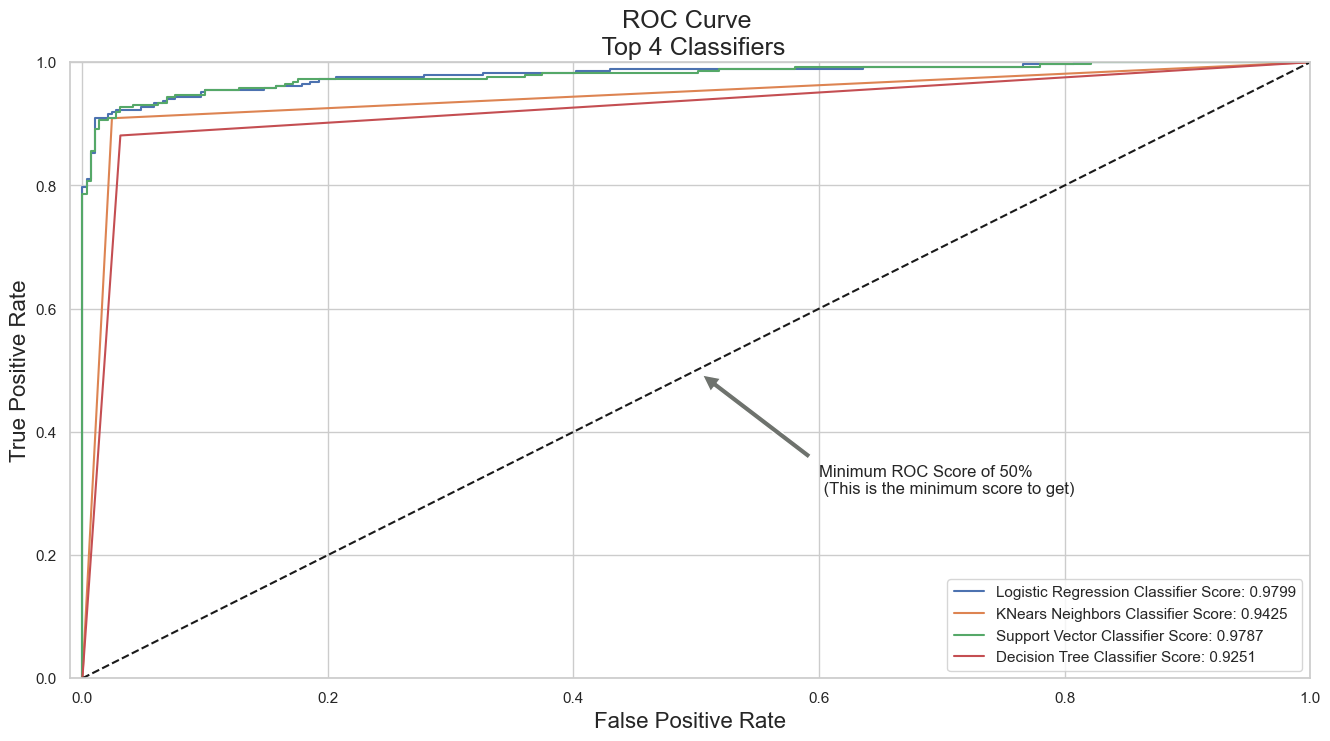

In [475]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()


# Análise Aprofundada da Logistic Regression

Nesta seção, realizamos uma análise detalhada do classificador de **Regressão Logística**.

## Termos Importantes

- **Verdadeiros Positivos (TP)**: Transações fraudulentas classificadas corretamente.
- **Falsos Positivos (FP)**: Transações fraudulentas classificadas incorretamente.
- **Verdadeiros Negativos (TN)**: Transações não fraudulentas classificadas corretamente.
- **Falsos Negativos (FN)**: Transações não fraudulentas classificadas incorretamente.

## Métricas

### Precisão (Precision)

A **precisão** é uma medida de quão exato é o modelo ao detectar transações fraudulentas. Ela pode ser expressa como:

$$
\text{Precisão} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Positivos}}
$$

### Recall

O **recall** indica a capacidade do modelo de identificar todas as transações fraudulentas. A fórmula é:

$$
\text{Recall} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Negativos}}
$$

### Trade-off entre Precisão e Recall

- **Precisão**: Quanto mais **preciso** (seletivo) for o modelo, menos transações fraudulentas ele detectará.
- **Recall**: Quanto maior o recall, mais transações fraudulentas o modelo detectará, mas com o risco de reduzir a precisão.

#### Exemplo de Trade-off

Suponha que nosso modelo tenha uma precisão de 95%. Se houver 5 casos de fraude e o modelo for 95% preciso, ele acertará 95% desses casos. No entanto, se o modelo diminuir sua precisão para 90%, ele será capaz de detectar mais casos de fraude, mas com a possibilidade de incluir falsos positivos.

## Resumo

- A precisão começa a cair entre 0,90 e 0,92.
- Apesar disso, a pontuação de precisão ainda é bastante alta.
- A pontuação de **recall** apresenta uma tendência de queda à medida que o modelo se torna mais preciso.

---

**Nota:** A busca por um bom equilíbrio entre **precisão** e **recall** é essencial para modelos de detecção de fraudes, pois uma melhoria em um aspecto pode impactar negativamente o outro.


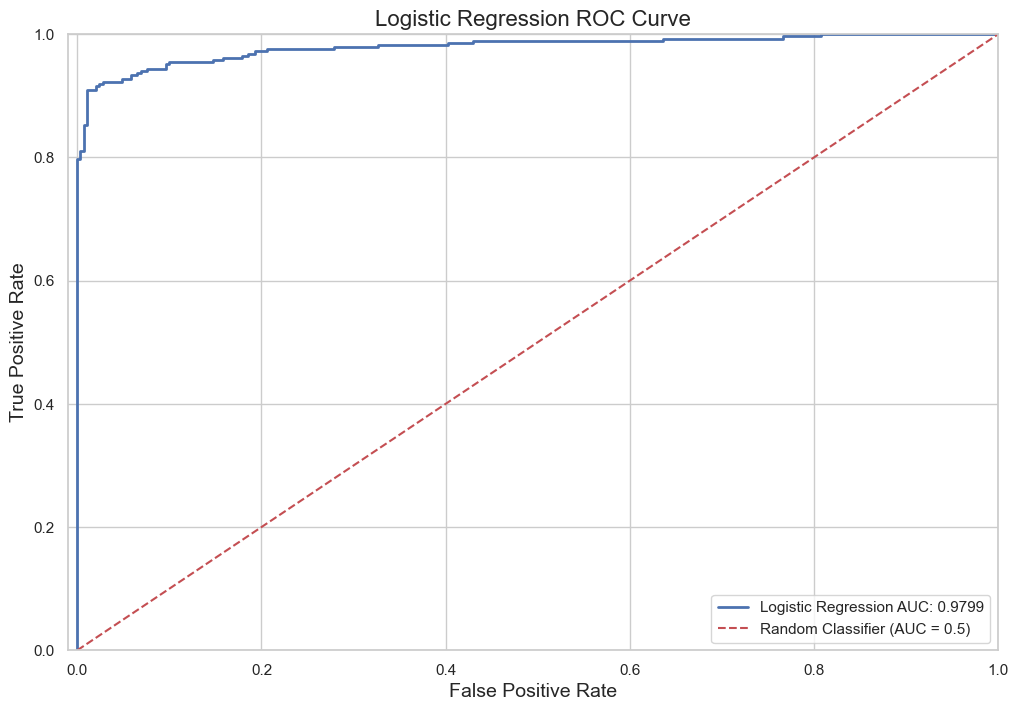

In [476]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

def logistic_roc_curve(fpr, tpr, model_name, auc_score):
    """
    Função para plotar a curva ROC para o classificador de Regressão Logística.
    
    Parâmetros:
    - fpr: False Positive Rate
    - tpr: True Positive Rate
    - model_name: Nome do modelo para exibição no gráfico
    - auc_score: Pontuação AUC para exibir no gráfico
    """
    plt.figure(figsize=(12, 8))
    plt.title(f'{model_name} ROC Curve', fontsize=16)
    
    # Plotando a curva ROC
    plt.plot(fpr, tpr, 'b-', label=f'{model_name} AUC: {auc_score:.4f}', linewidth=2)
    
    # Linha de referência (classificador aleatório)
    plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier (AUC = 0.5)")
    
    # Definindo os rótulos dos eixos
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    
    # Definindo os limites do gráfico
    plt.axis([-0.01, 1, 0, 1])
    
    # Adicionando a legenda
    plt.legend(loc="lower right")
    
    # Exibindo o gráfico
    plt.grid(True)

# Exemplo de uso
# Calculando a AUC
auc_score = roc_auc_score(y_train, log_reg_pred)

# Chamando a função para plotar a curva ROC
logistic_roc_curve(log_fpr, log_tpr, 'Logistic Regression', auc_score)

# Exibindo o gráfico
plt.show()


In [477]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [478]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('Como deveria ser:\n')
print("Accuracy Score: {:.2f}".format(np.mean(accuracy)))
print("Precision Score: {:.2f}".format(np.mean(precision)))
print("Recall Score: {:.2f}".format(np.mean(recall)))
print("F1 Score: {:.2f}".format(np.mean(f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.96
Precision Score: 0.72
F1 Score: 0.82
Accuracy Score: 0.79
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
Como deveria ser:

Accuracy Score: 0.56
Precision Score: 0.83
Recall Score: 0.75
F1 Score: 0.01
---------------------------------------------------------------------------------------------------------------------------------------


In [479]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [480]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.07


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.07')

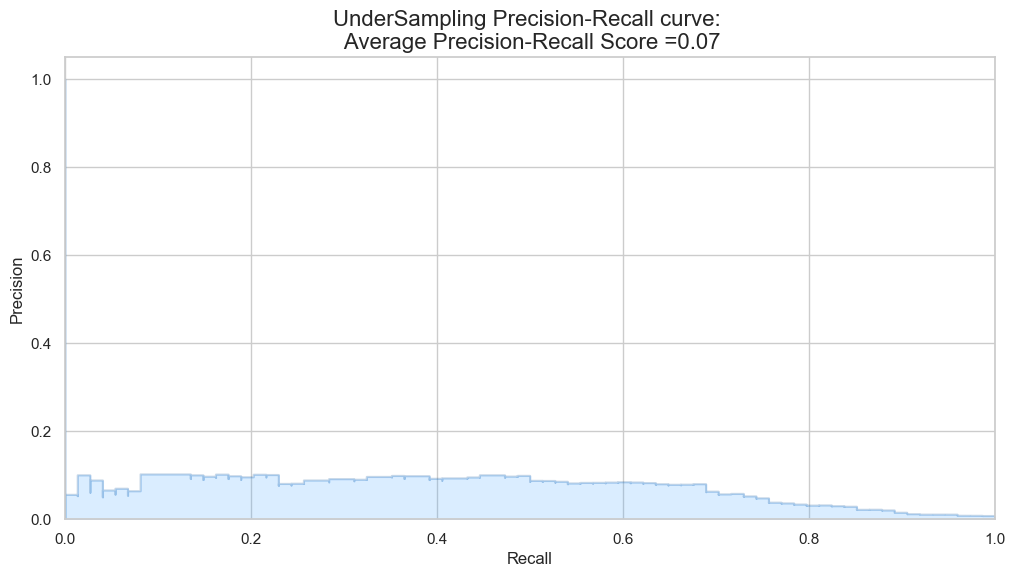

In [481]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

# Técnica SMOTE (Over-Sampling)

![SMOTE](https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png)  
*Figura 1: Visualização da Técnica SMOTE (Synthetic Minority Over-sampling Technique)*

SMOTE significa **Synthetic Minority Over-sampling Technique**. Ao contrário do **Random UnderSampling**, o SMOTE cria **novos pontos sintéticos** para equilibrar as classes, tornando-se uma alternativa eficaz para resolver problemas de desequilíbrio de classe.

## Entendendo o SMOTE

### 1. Resolvendo o Desequilíbrio de Classe
O SMOTE resolve o desequilíbrio de classe criando **pontos sintéticos** da classe minoritária, o que resulta em um equilíbrio entre as classes minoritária e majoritária.

### 2. Localização dos Pontos Sintéticos
O SMOTE gera novos pontos sintéticos com base nas **distâncias entre os vizinhos mais próximos** da classe minoritária. A partir dessas distâncias, ele cria novos exemplos sintéticos, aumentando a diversidade e representatividade da classe minoritária.

### 3. Efeito Final
Ao contrário do **random undersampling**, que descarta dados, o SMOTE **retém mais informações** ao gerar pontos sintéticos. Isso é especialmente importante em casos de desequilíbrio de classe, onde perder dados pode prejudicar a qualidade do modelo.

### 4. Precisão x Troca de Tempo
Embora o SMOTE geralmente proporcione um modelo mais preciso do que a subamostragem aleatória, ele **demora mais tempo para treinar**, pois não há exclusão de dados, como ocorre no caso do **undersampling**.

---

## Erro de Overfitting de Validação Cruzada

### Overfitting Durante a Validação Cruzada
Quero compartilhar um erro comum que cometi e que muitos fazem ao trabalhar com subamostragem ou superamostragem dos dados. **Nunca faça a subamostragem ou superamostragem antes da validação cruzada**, pois isso pode **vazar dados** para o conjunto de validação, distorcendo os resultados.

Durante a validação cruzada, os dados são divididos em **k** lotes, e, a cada iteração, um lote é usado como **conjunto de validação** e os outros **k-1 lotes** como **conjunto de treinamento**. O **conjunto de teste** nunca deve ser tocado. Portanto, criar pontos sintéticos antes de iniciar a validação cruzada afetará o conjunto de validação e causará um **vazamento de dados**.

### A Maneira Errada
Se você criar pontos sintéticos antes de realizar a validação cruzada, estará **influenciando o conjunto de validação** durante o processo de treinamento, o que resultará em uma avaliação incorreta do modelo. Veja como isso pode afetar os resultados:

1. Suponha que temos dados desbalanceados e usamos SMOTE para criar pontos sintéticos da classe minoritária.
2. Ao aplicar isso antes da validação cruzada, o **conjunto de validação** será afetado pelos dados sintéticos, resultando em **pontuações artificiais** de precisão e recall.

### A Maneira Certa
A maneira correta é aplicar o SMOTE **durante a validação cruzada**. Isso significa que os pontos sintéticos devem ser gerados apenas **para o conjunto de treinamento** em cada iteração, garantindo que o conjunto de validação permaneça **inviolável**. Dessa forma, evitamos o **vazamento de dados** e obtemos uma avaliação mais precisa do modelo.

---

## Referências

- **Lidando com Dados Desequilibrados**: Subamostragem, Sobreamostragem e Validação Cruzada Adequada ()
- **SMOTE Explicado para Iniciantes**
- **Aprendizado de Máquina**: Sobre Subamostragem e Sobreamostragem - Python / Scikit-learn / Scikit-Imblearn


In [482]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline
import numpy as np

# Exibe o tamanho dos conjuntos de treinamento e teste
print(f'Length of X (train): {len(original_Xtrain)} | Length of y (train): {len(original_ytrain)}')
print(f'Length of X (test): {len(original_Xtest)} | Length of y (test): {len(original_ytest)}')

# Listas para armazenar as métricas de avaliação
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Hiperparâmetros para a regressão logística
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Cria um objeto RandomizedSearchCV para ajuste de hiperparâmetros
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4, cv=5, random_state=42)

# Inicializa o Stratified K-Fold para validação cruzada
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Aplica SMOTE durante a validação cruzada para balancear a distribuição das classes
for train_idx, test_idx in sss.split(original_Xtrain, original_ytrain):
    # Define o pipeline com SMOTE e RandomizedSearchCV para a Regressão Logística
    pipeline = make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    
    # Ajusta o pipeline aos dados de treinamento
    pipeline.fit(original_Xtrain[train_idx], original_ytrain[train_idx])
    
    # Obtém o melhor estimador após o ajuste de hiperparâmetros
    best_est = rand_log_reg.best_estimator_
    
    # Faz previsões no fold de teste
    predictions = best_est.predict(original_Xtrain[test_idx])
    
    # Calcula as métricas de avaliação e adiciona às respectivas listas
    accuracy_lst.append(pipeline.score(original_Xtrain[test_idx], original_ytrain[test_idx]))
    precision_lst.append(precision_score(original_ytrain[test_idx], predictions))
    recall_lst.append(recall_score(original_ytrain[test_idx], predictions))
    f1_lst.append(f1_score(original_ytrain[test_idx], predictions))
    auc_lst.append(roc_auc_score(original_ytrain[test_idx], predictions))

# Exibe a média de cada métrica
print('-' * 90)
print(f'Accuracy: {np.mean(accuracy_lst):.4f}')
print(f'Precision: {np.mean(precision_lst):.4f}')
print(f'Recall: {np.mean(recall_lst):.4f}')
print(f'F1 Score: {np.mean(f1_lst):.4f}')
print(f'AUC: {np.mean(auc_lst):.4f}')
print('-' * 90)

Length of X (train): 152000 | Length of y (train): 152000
Length of X (test): 37999 | Length of y (test): 37999
------------------------------------------------------------------------------------------
Accuracy: 0.9760
Precision: 0.0694
Recall: 0.9059
F1 Score: 0.1288
AUC: 0.9410
------------------------------------------------------------------------------------------


In [483]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.93      0.96     37925
       Fraud       0.03      0.93      0.05        74

    accuracy                           0.93     37999
   macro avg       0.51      0.93      0.51     37999
weighted avg       1.00      0.93      0.96     37999



In [484]:
y_score = best_est.decision_function(original_Xtest)

In [485]:
average_precision = average_precision_score(original_ytest, y_score)

print('Pontuação média de recall de precisão: {0:0.2f}'.format(
average_precision))

Pontuação média de recall de precisão: 0.89


Text(0.5, 1.0, 'Curva de precisão-recall de sobreamostragem: \n Pontuação média de precisão-recall =0.89')

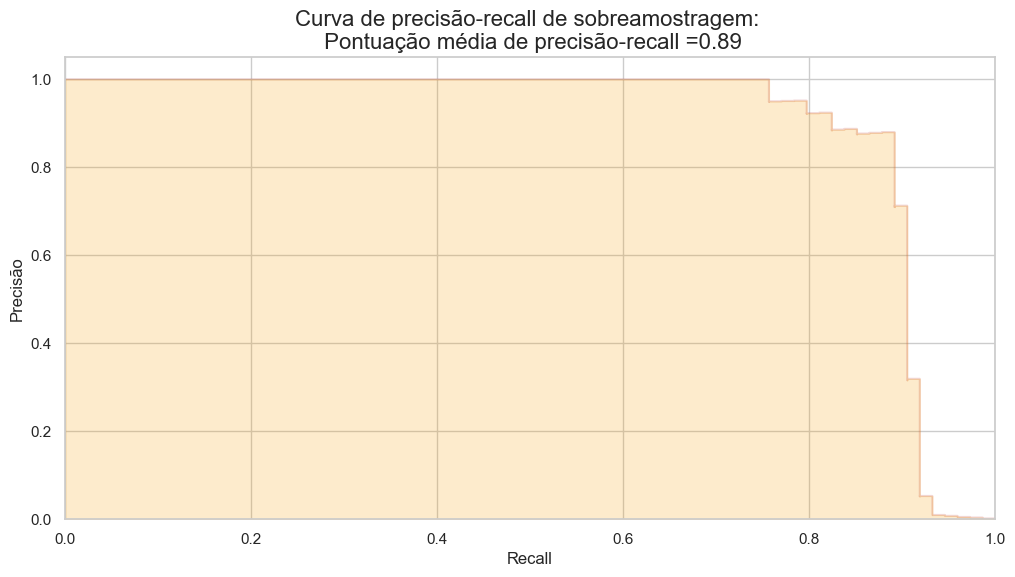

In [486]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step ='post', alpha=0.2, color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva de precisão-recall de sobreamostragem: \n Pontuação média de precisão-recall ={0:0.2f}'.format(average_precision), fontsize=16)

In [487]:

from imblearn.over_sampling import SMOTE

# Definir o SMOTE com sampling_strategy
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Aplicar o SMOTE ao conjunto de treinamento
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [488]:
# Melhoramos a pontuação em 2% pontos aproximadamente
# Implementamos GridSearchCV e os outros modelos.

# Regressão Logística

t0 = time.time()
log_reg_sm = log_reg  # log_reg já é o melhor modelo ajustado pelo GridSearchCV.
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("O ajuste dos dados de sobreamostragem levou :{} sec".format(t1 - t0))

O ajuste dos dados de sobreamostragem levou :1.2296288013458252 sec


# Dados de Teste com Regressão Logística

## Matriz de Confusão

A matriz de confusão avalia a precisão do modelo em classificar os dados. Os rótulos "Não" e "Sim" indicam classes, enquanto "Verdadeiro" e "Falso" representam classificações corretas ou incorretas.

- **Verdadeiros Negativos (quadrado superior esquerdo)**:  
  Número de classificações corretas da classe **"Não"** (nenhuma fraude detectada).

- **Falsos Negativos (quadrado superior direito)**:  
  Número de classificações incorretas da classe **"Não"** (nenhuma fraude detectada).

- **Falsos Positivos (quadrado inferior esquerdo)**:  
  Número de classificações incorretas da classe **"Sim"** (fraude detectada).

- **Verdadeiros Positivos (quadrado inferior direito)**:  
  Número de classificações corretas da classe **"Sim"** (fraude detectada).

---

## Resumo

### Subamostragem Aleatória
Os modelos de classificação foram avaliados em um subconjunto criado por **subamostragem aleatória**.  
> **Nota**: Esses dados não correspondem ao dataframe original.

### Modelos de Classificação
Os modelos que apresentaram o melhor desempenho foram:  
- **Regressão Logística**  
- **Classificador de Vetor de Suporte (SVM)**


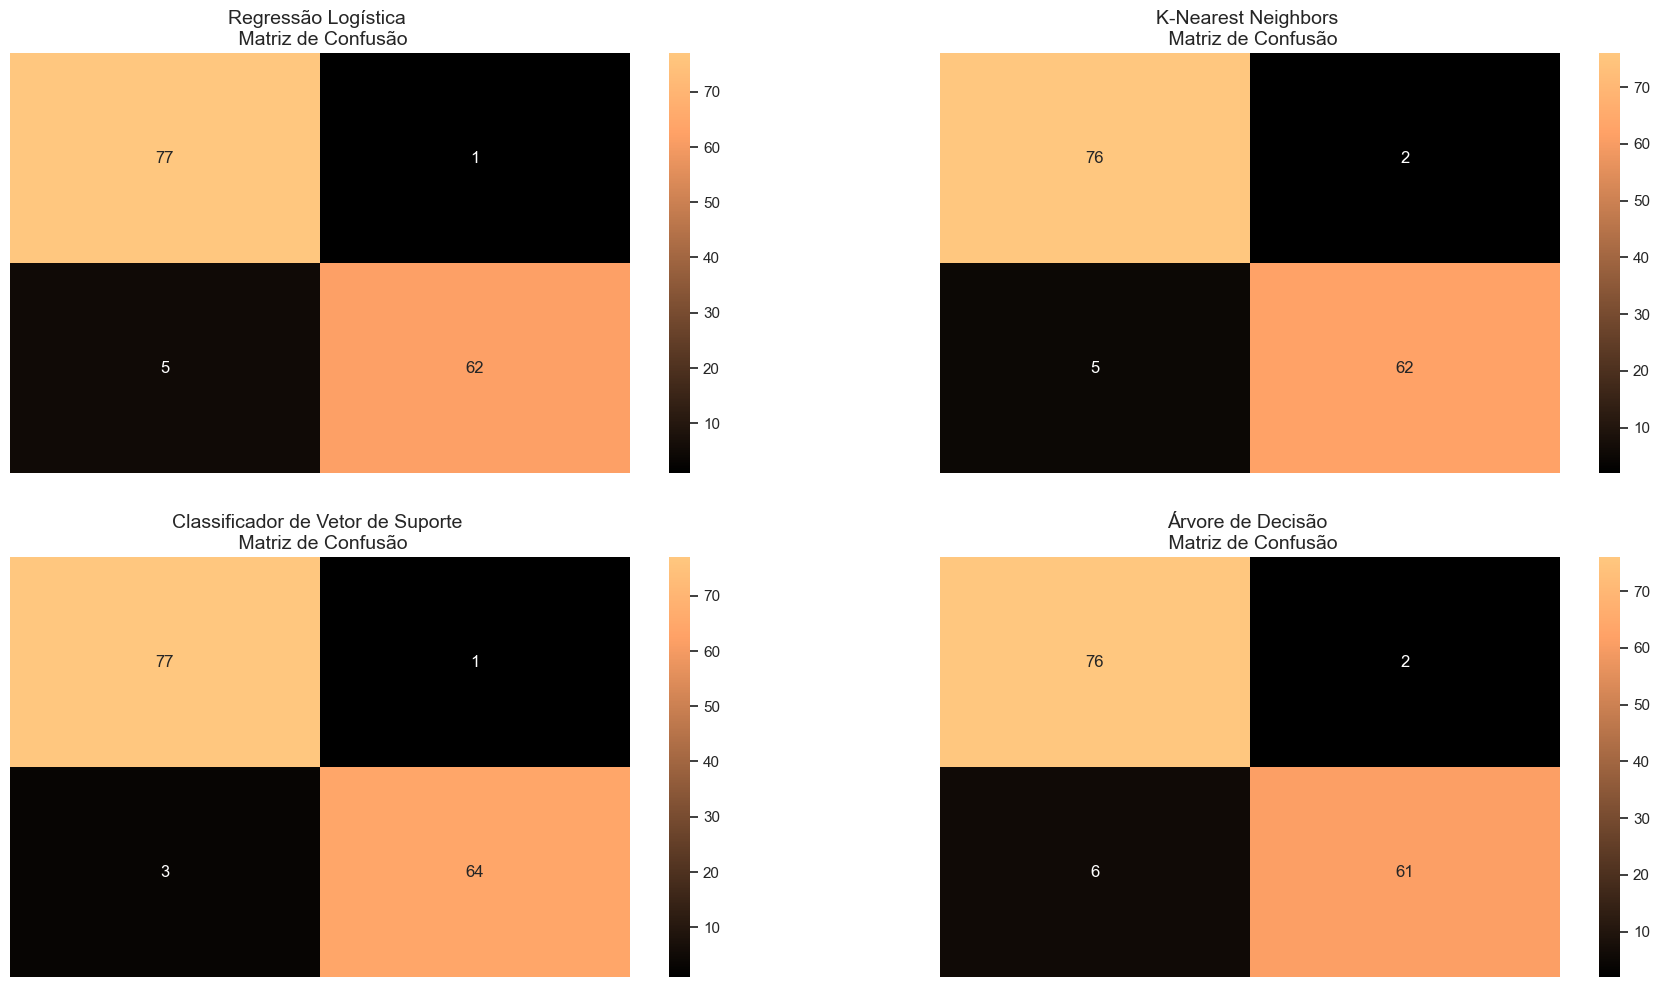

In [489]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predição com os modelos de classificação

# Modelo de Regressão Logística ajustado com a técnica SMOTE
y_pred_log_reg = log_reg_sm.predict(X_test)

# Modelos ajustados com UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)  # Predição com K-Nearest Neighbors
y_pred_svc = svc.predict(X_test)  # Predição com SVC (Support Vector Classifier)
y_pred_tree = tree_clf.predict(X_test)  # Predição com Árvore de Decisão

# Criação das matrizes de confusão para cada modelo
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)  # Matriz de confusão - Regressão Logística
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)  # Matriz de confusão - KNN
svc_cf = confusion_matrix(y_test, y_pred_svc)  # Matriz de confusão - SVC
tree_cf = confusion_matrix(y_test, y_pred_tree)  # Matriz de confusão - Árvore de Decisão

# Configuração da figura para plotagem das matrizes
fig, ax = plt.subplots(2, 2, figsize=(22, 12))  # Criação de uma grade 2x2 para os gráficos

# Plotando a matriz de confusão da Regressão Logística
sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)  # Gráfico de calor
ax[0, 0].set_title("Regressão Logística \n Matriz de Confusão", fontsize=14)  # Título
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)  # Configuração dos rótulos do eixo X
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)  # Configuração dos rótulos do eixo Y

# Plotando a matriz de confusão do K-Nearest Neighbors
sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("K-Nearest Neighbors \n Matriz de Confusão", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

# Plotando a matriz de confusão do SVC
sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Classificador de Vetor de Suporte \n Matriz de Confusão", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

# Plotando a matriz de confusão da Árvore de Decisão
sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Árvore de Decisão \n Matriz de Confusão", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

# Exibindo o gráfico
plt.show()


In [490]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        78
           1       0.98      0.93      0.95        67

    accuracy                           0.96       145
   macro avg       0.96      0.96      0.96       145
weighted avg       0.96      0.96      0.96       145

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        78
           1       0.97      0.93      0.95        67

    accuracy                           0.95       145
   macro avg       0.95      0.95      0.95       145
weighted avg       0.95      0.95      0.95       145

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        78
           1       0.98      0.96      0.97        67

    accuracy                           0.97       145
   macro avg       0.97      0.97      0.97       145
weighted

In [491]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Cálculo da acurácia no conjunto de teste para Regressão Logística

# Regressão Logística com Under-Sampling
# Predição com o modelo ajustado com técnica de subamostragem aleatória (Under-Sampling)
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)  # Calcula a acurácia para Under-Sampling

# Regressão Logística com Técnica SMOTE
# Predição com o modelo ajustado com a técnica de oversampling SMOTE
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)  # Calcula a acurácia para SMOTE

# Criação de um DataFrame para comparar as técnicas e suas acurácias
data = {
    'Técnica': ['Under-Sampling Aleatório', 'Over-Sampling (SMOTE)'],  # Nomes das técnicas
    'Acurácia': [undersample_score, oversample_score]  # Acurácia de cada técnica
}
final_df = pd.DataFrame(data=data)

# Ajuste na ordem das colunas do DataFrame (opcional para garantir estrutura desejada)
acuracia_coluna = final_df['Acurácia']  # Armazena a coluna de acurácia
final_df.drop('Acurácia', axis=1, inplace=True)  # Remove a coluna temporariamente
final_df.insert(1, 'Acurácia', acuracia_coluna)  # Insere a coluna na posição desejada

# Observação importante:
# Altos valores de acurácia podem ser enganosos, especialmente em problemas com classes desbalanceadas.
# Use métricas complementares (como precisão, recall e F1-score) para uma análise mais completa.

# Exibição do DataFrame final com os resultados
final_df


,Técnica,Acurácia
0,Under-Sampling Aleatório,0.958621
1,Over-Sampling (SMOTE),0.931682


# Redes Neurais: Comparando Subamostragem Aleatória vs. Sobreamostragem (SMOTE)

Nesta seção, implementaremos uma rede neural simples (com uma camada oculta) para comparar a precisão de dois modelos de regressão logística (usando subamostragem aleatória e sobreamostragem SMOTE) na detecção de transações fraudulentas e não fraudulentas.

## Objetivo Principal

O objetivo principal é analisar o desempenho de nossa rede neural em dois tipos de conjuntos de dados: subamostragem aleatória e sobreamostragem (SMOTE). Queremos avaliar a capacidade de previsão de transações fraudulentas e não fraudulentas. 

**Por que não focar apenas em fraudes?**  
Imagine ser um portador de cartão e, após uma compra legítima, seu cartão ser bloqueado porque o banco identificou erroneamente a transação como fraude. Isso ilustra a importância de não apenas detectar fraudes, mas também classificar corretamente transações não fraudulentas.

## Matriz de Confusão

A matriz de confusão é usada para avaliar o desempenho do modelo. Aqui está a explicação para cada quadrante:

- **Quadrado superior esquerdo**: Transações corretamente classificadas como "Nenhuma Fraude".
- **Quadrado superior direito**: Transações incorretamente classificadas como "Fraude", mas o rótulo real é "Nenhuma Fraude" (Falsos Positivos).
- **Quadrado inferior esquerdo**: Transações incorretamente classificadas como "Nenhuma Fraude", mas o rótulo real é "Fraude" (Falsos Negativos).
- **Quadrado inferior direito**: Transações corretamente classificadas como "Fraude".

## Resumo do Modelo (Keras || Subamostragem Aleatória)

- **Conjunto de Dados**: Ajustaremos o modelo tanto no conjunto de dados subamostrado aleatoriamente quanto no conjunto de dados sobreamostrado (SMOTE) para prever os resultados com os dados de teste do dataframe original.
  
- **Estrutura da Rede Neural**:  
  O modelo consiste em:
  - **Camada de entrada**: O número de nós é igual ao número de recursos, mais um nó de viés.
  - **Camada oculta**: Com 32 nós.
  - **Camada de saída**: Contém dois resultados possíveis: 0 (Nenhuma Fraude) ou 1 (Fraude).
  
- **Parâmetros do Modelo**:
  - **Taxa de aprendizado**: 0,001.
  - **Otimizador**: AdamOptimizer.
  - **Função de ativação**: ReLU para a camada oculta.
  - **Função de perda**: Entropia cruzada categórica esparsa, que calcula a probabilidade de cada transação ser fraude ou não fraude, e a previsão escolherá a classe com maior probabilidade.

A análise do desempenho será feita com base nos resultados da matriz de confusão, comparando a eficácia dos modelos em ambos os cenários de subamostragem e sobreamostragem.


In [492]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])


In [493]:
undersample_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,988 (7.77 KB)

 Trainable params: 1,988 (7.77 KB)

 Non-trainable params: 0 (0.00 B)

In [494]:
# Compilando o modelo com o otimizador Adam e uma taxa de aprendizado de 0.001
undersample_model.compile(
    optimizer=Adam(learning_rate=0.001),  # 'Adam' é um otimizador adaptativo, e 'learning_rate' define a taxa de aprendizado.
    loss='sparse_categorical_crossentropy',  # 'sparse_categorical_crossentropy' é usada para problemas de classificação com múltiplas classes e rótulos inteiros.
    metrics=['accuracy']  # 'accuracy' é a métrica escolhida para monitorar o desempenho do modelo durante o treinamento.
)


In [495]:
# Treinando o modelo com os dados de treino e validação, especificando parâmetros detalhados

undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
19/19 - 1s - 38ms/step - accuracy: 0.6876 - loss: 0.6987 - val_accuracy: 0.7845 - val_loss: 0.4600
Epoch 2/20
19/19 - 0s - 5ms/step - accuracy: 0.8894 - loss: 0.3354 - val_accuracy: 0.8362 - val_loss: 0.3959
Epoch 3/20
19/19 - 0s - 5ms/step - accuracy: 0.9176 - loss: 0.2695 - val_accuracy: 0.8534 - val_loss: 0.3629
Epoch 4/20
19/19 - 0s - 5ms/step - accuracy: 0.9349 - loss: 0.2257 - val_accuracy: 0.8707 - val_loss: 0.3359
Epoch 5/20
19/19 - 0s - 5ms/step - accuracy: 0.9458 - loss: 0.1931 - val_accuracy: 0.8793 - val_loss: 0.3062
Epoch 6/20
19/19 - 0s - 5ms/step - accuracy: 0.9523 - loss: 0.1663 - val_accuracy: 0.9052 - val_loss: 0.2882
Epoch 7/20
19/19 - 0s - 5ms/step - accuracy: 0.9523 - loss: 0.1458 - val_accuracy: 0.9138 - val_loss: 0.2722
Epoch 8/20
19/19 - 0s - 5ms/step - accuracy: 0.9588 - loss: 0.1293 - val_accuracy: 0.9138 - val_loss: 0.2585
Epoch 9/20
19/19 - 0s - 5ms/step - accuracy: 0.9610 - loss: 0.1174 - val_accuracy: 0.9224 - val_loss: 0.2495
Epoch 10/20
19/19 

In [496]:
# Fazendo previsões com o modelo treinado usando os dados de teste originais.
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)


In [497]:
# Faz previsões para os dados de teste, retornando as probabilidades para cada classe
# O método 'predict' gera as probabilidades de cada classe (fraude ou não fraude) para cada entrada
# Em seguida, usamos 'argmax' para pegar a classe com a maior probabilidade (0 ou 1)
# Usamos 'batch_size=200' para processar 200 amostras por vez e 'verbose=0' para não exibir detalhes durante a execução
undersample_fraud_predictions_prob = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

# Obtendo a classe predita (fraude ou não fraude) para cada amostra
undersample_fraud_predictions = undersample_fraud_predictions_prob.argmax(axis=1)



In [498]:
import itertools

# Crie uma matriz de confusão.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão, sem normalização')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Matriz de confusão, sem normalização
[[36359  1566]
 [    2    72]]
Matriz de confusão, sem normalização
[[37925     0]
 [    0    74]]


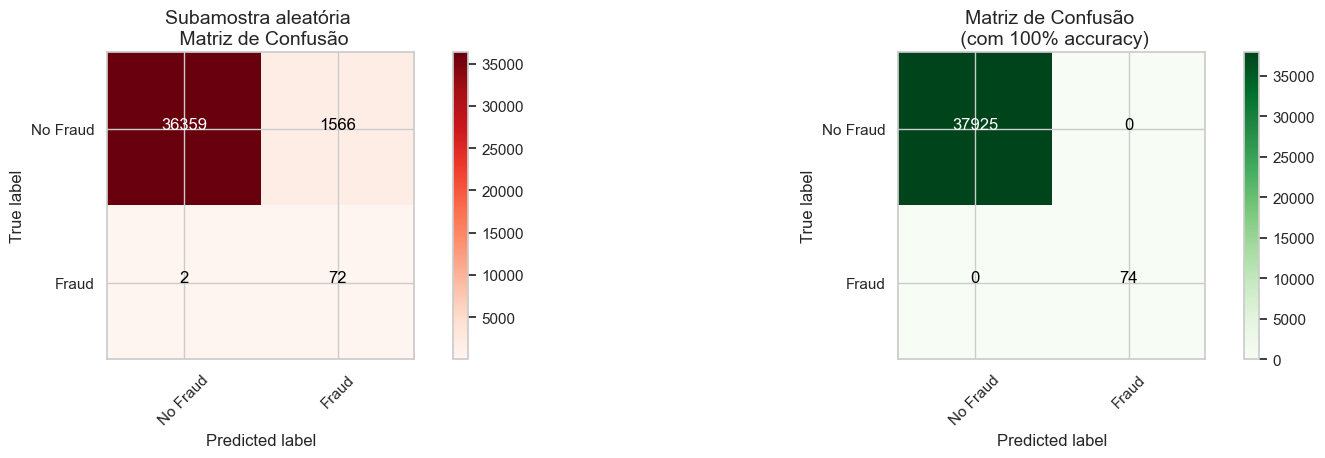

In [499]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Subamostra aleatória \n Matriz de Confusão", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Matriz de Confusão \n (com 100% accuracy)", cmap=plt.cm.Greens)

Keras || OverSampling (SMOTE):

In [500]:
# Definindo número de entradas
n_inputs = Xsm_train.shape[1]

# Construindo o modelo
oversample_model = Sequential([
    # Primeira camada oculta com ReLU
    Dense(n_inputs, input_shape=(n_inputs,), activation='relu', name="Camada_de_entrada"),
    
    # Segunda camada oculta
    Dense(32, activation='relu', name="Camada_Oculta"),
    
    # Camada de saída para classificação binária
    Dense(2, activation='softmax', name="Camada_de_saída")
])

# Resumo do modelo para verificar
oversample_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Camada_de_entrada (Dense)       │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Camada_Oculta (Dense)           │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Camada_de_saída (Dense)         │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,988 (7.77 KB)

 Trainable params: 1,988 (7.77 KB)

 Non-trainable params: 0 (0.00 B)

In [501]:
# Definindo o otimizador com a taxa de aprendizado
optimizer = Adam(learning_rate=0.001)

# Compilando o modelo
oversample_model.compile(
    optimizer=optimizer,  # Otimizador Adam com taxa de aprendizado definida
    loss='sparse_categorical_crossentropy',  # Função de perda para rótulos inteiros
    metrics=['accuracy']  # Métrica de avaliação principal
)


In [502]:
# Verifique as dimensões dos dados
print(f"Xsm_train shape: {Xsm_train.shape}")
print(f"ysm_train shape: {ysm_train.shape}")

# Verifique os tipos dos dados
print(f"Xsm_train type: {Xsm_train.dtype}")
print(f"ysm_train type: {ysm_train.dtype}")

# Verifique os valores únicos dos rótulos (se forem classes)
print(f"Valores únicos em ysm_train: {np.unique(ysm_train)}")



Xsm_train shape: (303406, 30)
ysm_train shape: (303406,)
Xsm_train type: float64
ysm_train type: int64
Valores únicos em ysm_train: [0 1]


## Com base nos resultados, os dados têm o seguinte formato e características:

### Xsm_train:

- Forma: (303406, 30) -> 303.406 amostras e 30 recursos.
- Tipo: float64. Isso precisa ser convertido para float32 para compatibilidade com o TensorFlow.
### ysm_train:

- Forma: (303406,) -> 303.406 rótulos, correspondendo às amostras em Xsm_train.
- Tipo: int64. Para classificação binária, int64 geralmente funciona, mas a conversão para int32 pode prevenir problemas futuros.
### Valores únicos em ysm_train:

- [0, 1] indica rótulos binários adequados para a saída do modelo com ativação sigmoid.

In [503]:
# Correções necessárias, Converta os tipos de dados.

# Converta Xsm_train para float32
Xsm_train = Xsm_train.astype(np.float32)

# Converta ysm_train para int32
ysm_train = ysm_train.astype(np.int32)

# Verifique os resultados novamente
print(f"Xsm_train type: {Xsm_train.dtype}, shape: {Xsm_train.shape}")
print(f"ysm_train type: {ysm_train.dtype}, shape: {ysm_train.shape}")

Xsm_train type: float32, shape: (303406, 30)
ysm_train type: int32, shape: (303406,)


In [504]:
# Validar o modelo

# Modelo compatível com os dados
oversample_model = Sequential([
    Dense(64, activation='relu', input_shape=(30,)),  # 30 recursos
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Saída binária
])

# Compile o modelo
oversample_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Verifique a arquitetura
oversample_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [505]:
# Teste com um subconjunto
history = oversample_model.fit(
    Xsm_train[:10], 
    ysm_train[:10], 
    epochs=1, 
    verbose=2
)


1/1 - 1s - 654ms/step - accuracy: 0.3000 - loss: 0.7053


In [506]:
# Execute o treinamento completo

history = oversample_model.fit(
    Xsm_train, 
    ysm_train, 
    validation_split=0.2, 
    batch_size=300, 
    epochs=20, 
    shuffle=True, 
    verbose=2
)


Epoch 1/20
810/810 - 2s - 3ms/step - accuracy: 0.9753 - loss: 0.0688 - val_accuracy: 0.9979 - val_loss: 0.0176
Epoch 2/20
810/810 - 2s - 2ms/step - accuracy: 0.9978 - loss: 0.0114 - val_accuracy: 1.0000 - val_loss: 0.0082
Epoch 3/20
810/810 - 2s - 2ms/step - accuracy: 0.9990 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 4/20
810/810 - 2s - 2ms/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 0.9999 - val_loss: 0.0034
Epoch 5/20
810/810 - 2s - 2ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/20
810/810 - 2s - 2ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 8.4030e-04
Epoch 7/20
810/810 - 2s - 2ms/step - accuracy: 0.9997 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/20
810/810 - 2s - 2ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9985 - val_loss: 0.0062
Epoch 9/20
810/810 - 2s - 2ms/step - accuracy: 0.9997 - loss: 0.0018 - val_accuracy: 0.9991 - val_loss: 0.00

In [507]:
# Realize as previsões no conjunto de teste com o modelo treinado
oversample_predictions = oversample_model.predict(
    original_Xtest, 
    batch_size=200, 
    verbose=0
)

# Converta as previsões em uma forma mais utilizável, se necessário
# Para classificação binária, você pode aplicar um limiar (e.g., 0.5)
threshold = 0.5
binary_predictions = (oversample_predictions >= threshold).astype(int)

# Imprima o formato das previsões para validação
print(f"Forma das previsões: {oversample_predictions.shape}")


Forma das previsões: (37999, 1)


In [508]:
# Realize as previsões no conjunto de teste
oversample_fraud_predictions = (oversample_model.predict(
    original_Xtest, 
    batch_size=200, 
    verbose=0
) >= 0.5).astype(int)

# Exiba a forma das previsões para validação
print(f"Forma das previsões: {oversample_fraud_predictions.shape}")
# Exiba uma amostra das previsões
print(f"Exemplo de previsões: {oversample_fraud_predictions[:10].flatten()}")

Forma das previsões: (37999, 1)
Exemplo de previsões: [1 1 1 1 1 1 1 1 1 1]


Matriz de confusão, sem normalização
[[37916     9]
 [   15    59]]
Matriz de confusão, sem normalização
[[37925     0]
 [    0    74]]


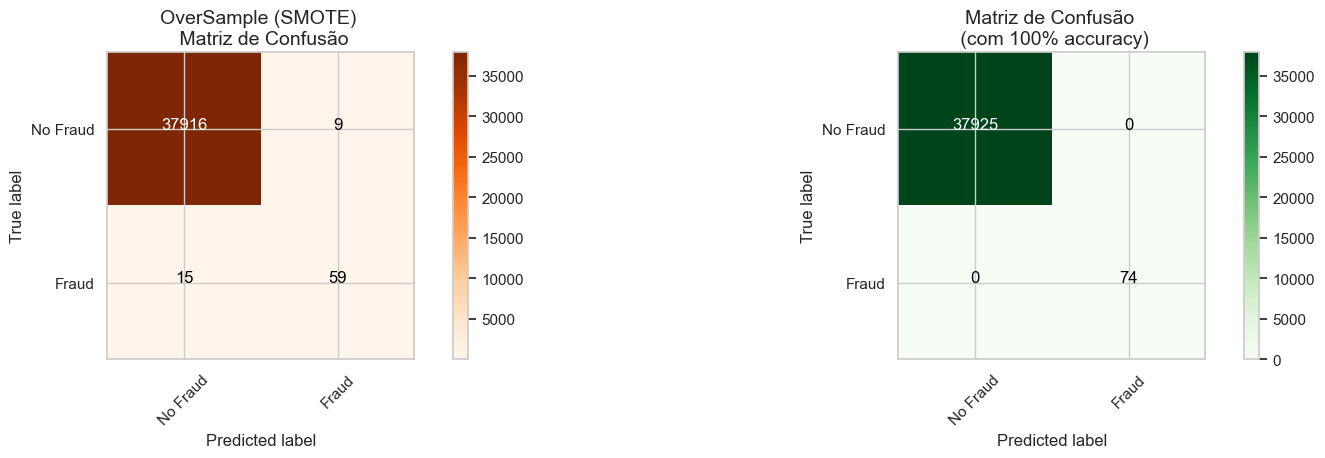

In [511]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Matriz de Confusão", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Matriz de Confusão \n (com 100% accuracy)", cmap=plt.cm.Greens)


## Conclusão

A implementação do SMOTE em nosso conjunto de dados desbalanceado foi eficaz para lidar com o desequilíbrio entre rótulos (muito mais transações sem fraude do que fraudulentas). No entanto, observamos que, em algumas situações, a rede neural treinada no conjunto de dados superamostrado prevê menos transações fraudulentas corretamente em comparação ao modelo treinado com o conjunto subamostrado. 

Vale destacar que a remoção de outliers foi aplicada apenas no conjunto de dados subamostrado aleatoriamente, mas não no conjunto superamostrado. Esse detalhe pode ter influenciado o desempenho dos modelos. Além disso, no conjunto subamostrado, o modelo apresentou dificuldade em classificar corretamente um número significativo de transações não fraudulentas, rotulando-as erroneamente como fraudulentas. Imagine o impacto disso: clientes realizando compras legítimas podem ter seus cartões bloqueados por engano, resultando em reclamações e insatisfação, o que seria uma grande desvantagem para a instituição financeira.

A próxima etapa desta análise será implementar a remoção de outliers no conjunto de dados superamostrado e avaliar se isso melhora a precisão do modelo no conjunto de teste.

**Nota:** As previsões e métricas de precisão podem variar devido ao embaralhamento de dados aplicado em ambos os tipos de dataframes. O objetivo principal é verificar se nossos modelos são capazes de classificar corretamente tanto transações sem fraude quanto fraudulentas.